# Обучение с учителем: качество модели

## Оглавление

- [Описание проекта](#описание-проекта)
- [Описание данных](#описание-данных)
- [Шаг 1. Загрузка данных](#шаг-1-загрузка-данных)
- [Шаг 2. Предобработка данных](#шаг-2-предобработка-данных)
- [Шаг 3. Исследовательский анализ данных](#шаг-3-исследовательский-анализ-данных)
- [Шаг 4. Объединение таблиц](#шаг-4-объединение-таблиц)
  - [4.1 Объединение основных таблиц](#41-объединение-основных-таблиц)
  - [4.2 Форматирование столбцов](#42-форматирование-столбцов)
- [Шаг 5. Корреляционный анализ](#шаг-5-корреляционный-анализ)
- [Шаг 6. Использование пайплайнов](#шаг-6-использование-пайплайнов)
  - [6.1 Подготовка данных](#61-подготовка-данных)
  - [6.2 Обучение моделей](#62-обучение-моделей)
  - [6.3 Выбор модели](#63-выбор-модели)
- [Шаг 7. Анализ важности признаков](#шаг-7-анализ-важности-признаков)
  - [7.1 Оценка важности](#71-оценка-важности)
  - [7.2 Выводы о признаках](#72-выводы-о-признаках)
- [Шаг 8. Сегментация покупателей](#шаг-8-сегментация-покупателей)
  - [8.1 Сегментация](#81-сегментация)
  - [8.2 Анализ группы](#82-анализ-группы)
  - [8.3 Выводы о сегментах](#83-выводы-о-сегментах)
- [Шаг 9. Общий вывод](#шаг-9-общий-вывод)


<a id="#описание-проекта"></a>
## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Отделу маркетинга поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Руководитель отдела сформировал задание:
 - Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров,  «прежний уровень».
 - Нужно собрать данные по клиентам по следующим группам: 
 - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
 - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
 - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
 - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Задачи:
 - Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
 - В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
 - Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

<a id="описание-данных"></a>
## Описание данных

Для анализа и построения модели используются следующие источники данных:

- **`market_file.csv`** — основная таблица с информацией о клиентах:  
  содержит данные об активности на сайте, маркетинговых коммуникациях и типе сервиса.

- **`market_money.csv`** — данные о выручке с каждого клиента:  
  фиксирует суммы покупок по различным временным периодам.

- **`market_time.csv`** — таблица с данными о поведении на сайте:  
  показывает, сколько времени клиент провёл на сайте в разные периоды.

- **`money.csv`** — информация о прибыльности клиентов:  
  отражает, какую прибыль принёс каждый покупатель за последние три месяца.

In [1]:
!pip install shap==0.41.0 phik==0.12.3 scikit-learn==1.2.2 matplotlib==3.5.0

In [2]:
# import numba
# numba.config.DISABLE_JIT = True  
import sklearn, matplotlib, shap, plotly
%matplotlib inline
print(
    f"scikit-learn: {sklearn.__version__}\n"
    f"matplotlib: {matplotlib.__version__}\n"
    f"SHAP: {shap.__version__}\n"
    f"plotly: {plotly.__version__}"
)
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.exceptions import NotFittedError
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import plotly.express as px
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost
from xgboost import XGBClassifier
print("XGBoost version:", xgboost.__version__)

scikit-learn: 1.2.2
matplotlib: 3.5.0
SHAP: 0.41.0
plotly: 5.4.0
XGBoost version: 1.5.1


<a id="шаг-1-загрузка-данных"></a>
##  Шаг 1. Загрузка данных 

На текущем этапе план действий следующий:
- Подключение необходимых библиотек;
- Загрузка исходных данных;
- Первичный анализ датасетов.

In [3]:
# Базовые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from pathlib import Path

# Предобработка данных
from IPython.display import display, Markdown
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   StandardScaler, MinMaxScaler)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectKBest

# Модели и оценка
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score

# SHAP
import shap
from shap import KernelExplainer

# Параллельные вычисления
from joblib import Parallel

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Но их лучше собрать в одной ячейке и разделить на функциональные группы пустой строкой.</font>

In [4]:
# Просмотр таблицы
def describe_df(df: pd.DataFrame) -> None:
    display(Markdown("### Информация о датасете:"))
    df.info()
    display(Markdown("### Пример данных:"))
    display(df.sample(10))
    display(Markdown("### Уникальные значения по столбцам:"))
    display(df.nunique())

In [5]:
def load(filename: str, fallback: str = None, **kwargs) -> pd.DataFrame:
    try:
        df = pd.read_csv(filename, **kwargs)
    except FileNotFoundError:
        if fallback:
            df = pd.read_csv(fallback, **kwargs)
        else:
            raise FileNotFoundError(f"Не удалось загрузить файл: {filename}")
    return df

In [6]:
market_file = load("market_file.csv", "/datasets/market_file.csv")
market_money = load("market_money.csv", "/datasets/market_money.csv",)
market_time = load("market_time.csv", "/datasets/market_time.csv")
money = load("money.csv", "/datasets/money.csv", sep = ';', decimal = ',')

In [7]:
# Выведем информацию о данных market_file
describe_df(market_file)           

### Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

### Пример данных:

id Покупательская активность Тип сервиса Разрешить сообщать  \
1008  216356           Прежний уровень    стандарт                 да   
132   215480                 Снизилась     премиум                 да   
851   216199           Прежний уровень     премиум                 да   
725   216073           Прежний уровень    стандарт                нет   
140   215488                 Снизилась    стандарт                 да   
711   216059           Прежний уровень     премиум                 да   
67    215415                 Снизилась    стандарт                 да   
1057  216405           Прежний уровень    стандарт                 да   
500   215848           Прежний уровень     премиум                 да   
844   216192           Прежний уровень    стандарт                 да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
1008                 5.5                     4          1022   
132                  4.4                     4           875   
851                  4.3                     3          1025   
725                  5.4                     4           226   
140                  4.1                     4           748   
711                  4.0                     4           861   
67                   2.4                     3           720   
1057                 4.0                     4           436   
500                  5.4                     5           645   
844                  3.3                     3           641   

      Акционные_покупки                  Популярная_категория  \
1008               0.91  Мелкая бытовая техника и электроника   
132                0.94                      Товары для детей   
851                0.20                     Домашний текстиль   
725                0.28  Мелкая бытовая техника и электроника   
140                0.93                       Кухонная посуда   
711                0.14        Техника для красоты и здоровья   
67                 0.32                     Домашний текстиль   
1057               0.21  Мелкая бытовая техника и электроника   
500                0.28  Мелкая бытовая техника и электроника   
844                0.27                 Косметика и аксесуары   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
1008                                    3                                   0   
132                                     2                                   2   
851                                     4                                   2   
725                                     6                                   0   
140                                     3                                   4   
711                                     3                                   4   
67                                      2                                   6   
1057                                    4                                   1   
500                                     3                                   3   
844                                     4                                   1   

      Ошибка_сервиса  Страниц_за_визит  
1008               3                11  
132                8                 5  
851                8                 8  
725                7                14  
140                2                 4  
711                4                11  
67                 3                 3  
1057               6                 9  
500                4                10  
844                1                 9

### Уникальные значения по столбцам:

id                                     1300
Покупательская активность                 2
Тип сервиса                               3
Разрешить сообщать                        2
Маркет_актив_6_мес                       41
Маркет_актив_тек_мес                      3
Длительность                            658
Акционные_покупки                        42
Популярная_категория                      6
Средний_просмотр_категорий_за_визит       6
Неоплаченные_продукты_штук_квартал       11
Ошибка_сервиса                           10
Страниц_за_визит                         20
dtype: int64

In [8]:
print(market_file["Покупательская активность"].value_counts())

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64


 Размер: 1300 строк × 13 столбцов  
- Пропуски: отсутствуют  
- Типы данных:  
  - Категориальные: `Покупательская активность`, `Тип сервиса`, `Разрешить сообщать`, `Популярная_категория`  
  - Числовые: 9 признаков, включая доли, длительность, количество ошибок и просмотров  
- Целевой признак: `Покупательская активность`  
  - Прежний уровень — 802  
  - Снизилась — 498  
- Замечание: найдено ошибочное значение `стандартт` в столбце `Тип сервиса` — требует замены.

In [9]:
# Выведем информацию о данных market_money
describe_df(market_money)

### Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


### Пример данных:

id               Период  Выручка
1697  215913     предыдущий_месяц   4640.0
2590  216211     предыдущий_месяц   5782.0
3594  216546     предыдущий_месяц   3155.0
405   215483     предыдущий_месяц   6349.0
2323  216122     предыдущий_месяц   4593.0
3517  216520     предыдущий_месяц   4532.5
2273  216105  препредыдущий_месяц   4754.0
373   215472     предыдущий_месяц   5920.5
211   215418  препредыдущий_месяц   4661.0
3679  216574     предыдущий_месяц   5052.0

### Уникальные значения по столбцам:

id         1300
Период        3
Выручка    2776
dtype: int64

- Размер: 3900 строк × 3 столбца  
- Пропуски: отсутствуют  
- Типы данных:
  - `id` — числовой идентификатор клиента (int64), 1300 уникальных клиентов  
  - `Период` — категориальный признак (object), всего 3 значения:
  - `текущий_месяц`, `предыдущий_месяц`, `препредыдущий_месяц`  
- `Выручка` — количественный признак (float64), значения указаны в рублях  
    - 2776 уникальных значений  
- Назначение:
  - Таблица фиксирует сумму выручки, полученной от каждого клиента за каждый из трёх периодов.

In [10]:
describe_df(market_time)

### Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


### Пример данных:

id            Период  минут
198   215447  предыдцщий_месяц      6
253   215474  предыдцщий_месяц     11
1982  216339  предыдцщий_месяц     18
883   215789     текущий_месяц     20
1003  215849  предыдцщий_месяц     18
573   215634  предыдцщий_месяц      7
1162  215929     текущий_месяц     19
303   215499     текущий_месяц     10
1301  215998     текущий_месяц     21
2183  216439  предыдцщий_месяц     16

### Уникальные значения по столбцам:

id        1300
Период       2
минут       20
dtype: int64

In [11]:
# Посчитаем все значения в столбце "Период"
unique_periods = market_time['Период'].unique()
print(f'Количество уникальных периодов: {len(unique_periods)}')
print(f'Уникальные периоды: {unique_periods}')

Количество уникальных периодов: 2
Уникальные периоды: ['текущий_месяц' 'предыдцщий_месяц']


In [12]:
# Заменим 'предыдцщий_месяц' на 'предыдущий_месяц'
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
# Посчитаем количество каждого уникального периода
period_counts = market_time['Период'].value_counts()
print(period_counts)

предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64


In [13]:
# Выведем информацию о данных market_time
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


- Размер: 2600 строк × 3 столбца  
- Пропуски: отсутствуют  
- Типы данных:
  - `id` — числовой идентификатор клиента (int64), 1300 уникальных значений  
  - `Период` — категориальный признак (object), 2 значения: `текущий_месяц`, `предыдущий_месяц`  
- `минут` — количественный признак (int64), время, проведённое на сайте, в минутах  
    - диапазон: от 1 до 20
- Особенности:
  - По 1300 записей на каждый период — данные сбалансированы  
  - В данных была опечатка (`предыдцщий_месяц`), она исправлена на `предыдущий_месяц`

In [14]:
describe_df(money)

### Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


### Пример данных:

id  Прибыль
412   215760     5.49
738   216086     2.66
768   216116     3.85
165   215513     3.15
571   215919     4.62
979   216327     3.23
1003  216351     3.29
1215  216563     3.38
971   216319     3.49
2     215350     3.13

### Уникальные значения по столбцам:

id         1300
Прибыль     400
dtype: int64

- Размер: 1300 строк × 2 столбца  
- Пропуски: отсутствуют  
- Типы данных:
  - `id` — уникальный идентификатор клиента (int64), 1300 уникальных значений  
- `Прибыль` — количественный признак (float64), значение прибыли магазина от клиента  
    - 400 уникальных значений
-  Внимание к единицам измерения:
Значения прибыли варьируются примерно от 1.0 до 7.0. Это **вызывает вопросы** относительно интерпретации: такие значения нетипичны для прибыли если не учитывать масштаб.
-  Важно: без уточнения от заказчика невозможно достоверно определить единицу измерения прибыли.
-  Поэтому: В проекте будем предпологать , что прибыль указана в долларах или условных единицах.
Изменять интерпретацию единиц **самостоятельно недопустимо**, чтобы избежать искажения исходного бизнес-смысла. Рекомендуется уточнить у заказчика, в каких единицах представлена прибыль.

<a id="#шаг-2-предобработка-данных"></a>
##  Шаг 2. Предобработка данных

In [15]:
num_duplicates = market_file.duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


In [16]:
# Замена некорректных значений
market_file['Популярная_категория'] = market_file['Популярная_категория'].replace(
    'Косметика и аксесуары', 'Косметика и аксессуары'
)
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

# Проверка замены: уникальные значения
print("Проверка замены в 'Популярная_категория':")
unique_categories = market_file['Популярная_категория'].unique()
print(unique_categories)

if 'Косметика и аксесуары' not in unique_categories:
    print("Старое значение отсутствует — замена прошла успешно.")
else:
    print("Найдено старое значение — проверьте регистр или пробелы.")

print("\n Проверка замены в 'Тип сервиса':")
print(market_file['Тип сервиса'].value_counts())

if 'стандартт' not in market_file['Тип сервиса'].values:
    print(" Ошибочное значение 'стандартт' успешно заменено.")
else:
    print(" Значение 'стандартт' всё ещё присутствует.")

Проверка замены в 'Популярная_категория':
['Товары для детей' 'Домашний текстиль' 'Косметика и аксессуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Старое значение отсутствует — замена прошла успешно.

 Проверка замены в 'Тип сервиса':
стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64
 Ошибочное значение 'стандартт' успешно заменено.


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [17]:
# Удалим дубликаты
market_file = market_file.drop_duplicates()
# Выведем информацию о данных
print(market_file.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [18]:
market_money['Выручка'] = pd.to_numeric(market_money['Выручка'], errors='coerce')

In [19]:
num_duplicates = market_money.duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


In [20]:
num_duplicates = market_time.duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


In [21]:
num_duplicates = money.duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


# Предобработка данных

1. **Загрузка и структура**

- **market_file**: 1300 строк × 13 столбцов  
- **market_money**, **market_time**, **money**: загружены без ошибок

2. **Дубликаты**
- Во всех таблицах `duplicated().sum()` = 0  
- В `market_file` применён `drop_duplicates()` для уверенности

3. **Коррекция категориальных признаков**
- **Тип сервиса**  
  - Было: `«стандартт»` → Стало: `«стандарт»`  
  - Итоговые значения:  
    - `стандарт` – 924  
    - `премиум` – 376

- **Популярная_категория**  
  - Исправлена опечатка `«Косметика и аксесуары»`  
  - Уникальные категории после правки:  
    - Товары для детей  
    - Домашний текстиль  
    - Косметика и аксессуары  
    - Техника для красоты и здоровья  
    - Кухонная посуда  
    - Мелкая бытовая техника и электроника

4. **Пропуски**
- Пропущенных значений нет: все столбцы содержат по 1300 непустых записей

5. ((Типы данных((
- **float64**: Маркет_актив_6_мес, Акционные_покупки  
- **int64**: id, Маркет_актив_тек_мес, Длительность, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Ошибка_сервиса, Страниц_за_визит  
- **object**: Покупательская_активность, Тип сервиса, Разрешить сообщать, Популярная_категория  

**Вывод:**  
Данные очищены от дубликатов и опечаток, отсутствуют пропуски. Датасет готов к дальнейшему анализу и моделированию.

<a id="#шаг-3-исследовательский-анализ-данных"></a>
## Шаг 3. Исследовательский анализ данных

- Проведите исследовательский анализ данных из каждой таблицы. 
- Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. 
- Оформите выводы по результатам шага.

In [22]:
# Анализ данных о поведении покупателя: действия на сайте, коммуникации и продуктовая активность
print("Статистическое описание данных о поведении покупателей (таблица market_file):")
display(market_file.describe())

Статистическое описание данных о поведении покупателей (таблица market_file):


id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

 - Анализ поведения покупателей (таблица `market_file`)
 - Транзакционная активность
Покупатели в среднем совершают **4.25 маркетинговых транзакций за последние 6 месяцев** и **4.01 за последний месяц**, что говорит о **высокой активности** на сайте.
 - Продолжительность визита
Средняя длительность сессии составляет **~602 секунды** (примерно **10 минут**), что указывает на **глубокую вовлечённость** пользователей при посещении сайта.
 - Акционные покупки
В среднем совершается **0.32 акционных покупки в квартал**, что свидетельствует о **низкой чувствительности к акциям и скидкам** со стороны покупателей.
- Просмотры категорий
Пользователи просматривают в среднем **3.27 категории за визит**, что может говорить о **фокусе на конкретных интересах**, а не на изучении широкого ассортимента.
-  Неоплаченные товары
В среднем покупатели оставляют **2.84 неоплаченных товара в корзине за квартал**, что может указывать на **потенциальные барьеры при оформлении заказа** или привычку «отложить на потом».
-  Ошибки сервиса
На одного пользователя приходится **4.18 ошибки обслуживания**, что может **негативно сказываться** на пользовательском опыте и увеличивать **риск оттока клиентов**.
- Глубина просмотра
В среднем пользователь просматривает **8.17 страниц за визит**, что говорит о **достаточной вовлечённости** и **желании изучить предложения сайта**.

In [23]:
# Выбор клинтов с покупательской активностью Снизилась
active_customers = market_file[market_file['Покупательская активность'] == 'Снизилась']
# Вывод информацим о данных
display(active_customers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 593
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   498 non-null    int64  
 1   Покупательская активность            498 non-null    object 
 2   Тип сервиса                          498 non-null    object 
 3   Разрешить сообщать                   498 non-null    object 
 4   Маркет_актив_6_мес                   498 non-null    float64
 5   Маркет_актив_тек_мес                 498 non-null    int64  
 6   Длительность                         498 non-null    int64  
 7   Акционные_покупки                    498 non-null    float64
 8   Популярная_категория                 498 non-null    object 
 9   Средний_просмотр_категорий_за_визит  498 non-null    int64  
 10  Неоплаченные_продукты_штук_квартал   498 non-null    int64  
 11  Ошибка_сервиса                  

None

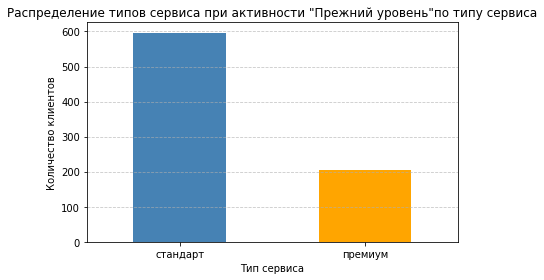

In [24]:
# Фильтрация клиентов с активностью "Прежний уровень"
active_customers  = market_file[market_file['Покупательская активность'] == 'Прежний уровень']

# Подсчёт количества клиентов по типу сервиса
service_counts = active_customers['Тип сервиса'].value_counts().reindex(['стандарт', 'премиум'], fill_value=0)

# Визуализация
plt.figure(figsize=(6, 4))
service_counts.plot(kind='bar', color=['steelblue', 'orange'])
plt.title('Распределение типов сервиса при активности "Прежний уровень"по типу сервиса')
plt.xlabel('Тип сервиса')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
# Выбор клиентов с активностью "Прежний уровень" и типом сервиса "стандарт"
standard_customers = market_file[
    (market_file['Покупательская активность'] == 'Прежний уровень') &
    (market_file['Тип сервиса'] == 'стандарт')
]

# Количество таких клиентов
num_standard = len(standard_customers)
print(f'Количество клиентов с активностью "Прежний уровень" и сервисом "стандарт": {num_standard}')

# Просмотр первых строк
display(standard_customers.head())

Количество клиентов с активностью "Прежний уровень" и сервисом "стандарт": 596


id Покупательская активность Тип сервиса Разрешить сообщать  \
400  215748           Прежний уровень    стандарт                нет   
402  215750           Прежний уровень    стандарт                 да   
403  215751           Прежний уровень    стандарт                 да   
404  215752           Прежний уровень    стандарт                нет   
407  215755           Прежний уровень    стандарт                 да   

     Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
400                 4.3                     4           534   
402                 4.8                     5           634   
403                 4.1                     4           957   
404                 4.0                     4           475   
407                 4.4                     4           216   

     Акционные_покупки                  Популярная_категория  \
400               0.18                       Кухонная посуда   
402               0.21                      Товары для детей   
403               0.17        Техника для красоты и здоровья   
404               0.30  Мелкая бытовая техника и электроника   
407               0.18        Техника для красоты и здоровья   

     Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
400                                    3                                   1   
402                                    4                                   5   
403                                    5                                   2   
404                                    3                                   3   
407                                    2                                   3   

     Ошибка_сервиса  Страниц_за_визит  
400               4                10  
402               3                10  
403               6                 9  
404               7                 7  
407               5                13

In [26]:
display(standard_customers.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     596.000000          596.000000            596.000000    596.000000   
mean   216240.817114            4.587081              4.050336    545.763423   
std       245.910017            0.860106              0.679211    244.141520   
min    215748.000000            0.900000              3.000000    121.000000   
25%    216044.750000            4.000000              4.000000    347.750000   
50%    216244.500000            4.400000              4.000000    525.500000   
75%    216455.250000            5.300000              5.000000    748.250000   
max    216646.000000            6.600000              5.000000   1052.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         596.000000                           596.000000   
mean            0.241493                             3.758389   
std             0.166756                             1.282859   
min             0.110000                             1.000000   
25%             0.160000                             3.000000   
50%             0.210000                             4.000000   
75%             0.260000                             5.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                          596.000000      596.000000        596.000000  
mean                             2.236577        4.345638          9.533557  
std                              1.509434        1.944956          3.306304  
min                              0.000000        0.000000          3.000000  
25%                              1.000000        3.000000          7.000000  
50%                              2.000000        4.000000          9.000000  
75%                              3.000000        6.000000         12.000000  
max                              8.000000        9.000000         19.000000

 - Анализ клиентов с активностью *«Прежний уровень»* и типом сервиса *«стандарт»*
В выборке содержится **596 клиентов**, относящихся к сегменту с покупательской активностью *«Прежний уровень»* и типом сервиса *«стандарт»* — это достаточно репрезентативная группа для анализа.

**Основные наблюдения**

1. **Маркетинговая активность**  
   • Среднее значение за 6 месяцев — **4.59** транзакций  
   • За последний месяц — **4.05**  
   → Наблюдается небольшое снижение активности в текущем периоде.

2. **Продолжительность визита**  
   • В среднем — **545.76 сек** (~9 минут)  
   • Стандартное отклонение — **244.14 сек**  
   → Клиенты проводят достаточно времени на сайте, но поведение разнообразное.

3. **Акционные покупки**  
   • В среднем — **0.24** акционных покупок за визит  
   → Акции не являются основной мотивацией к покупке.

4. **Просмотр категорий**  
   • Среднее количество категорий за визит — **3.76**  
   → Клиенты исследуют ассортимент, но остаются в пределах интересующих направлений.

5. **Неоплаченные товары**  
   • В среднем — **2.24 товара в квартал**  
   → Есть склонность к добавлению товаров в корзину без завершения покупки.

6. **Ошибки сервиса**  
   • В среднем — **4.35 ошибки на клиента**  
   → Высокий уровень ошибок может негативно сказываться на пользовательском опыте.

7. **Просмотр страниц за визит**  
   • В среднем — **9.53 страницы за визит**  
   → Клиенты активно изучают сайт, возможно, испытывают трудности с навигацией.


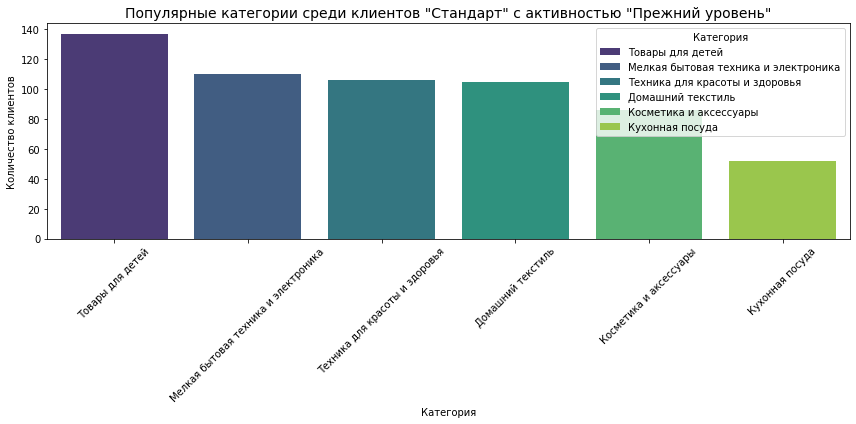

In [27]:
# Считаем количество записей по категориям
category_counts = standard_customers['Популярная_категория'].value_counts().reset_index()
category_counts.columns = ['Категория', 'Количество']

# Построение диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_counts,
    x='Категория',
    y='Количество',
    hue='Категория',
    palette='viridis',
    dodge=False,
    
)

# Настройка графика
plt.title('Популярные категории среди клиентов "Стандарт" с активностью "Прежний уровень"', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Фильтрация клиентов с активностью "Прежний уровень" и типом сервиса "премиум"
premium_customers = (
    market_file[
        (market_file['Покупательская активность'] == 'Прежний уровень') &
        (market_file['Тип сервиса'] == 'премиум')
    ]
)

# Вывод количества таких клиентов
print(f"Количество премиум-клиентов с активностью 'Прежний уровень': {len(premium_customers)}")

# Просмотр первых записей
display(premium_customers.head())

Количество премиум-клиентов с активностью 'Прежний уровень': 206


id Покупательская активность Тип сервиса Разрешить сообщать  \
401  215749           Прежний уровень     премиум                 да   
405  215753           Прежний уровень     премиум                 да   
406  215754           Прежний уровень     премиум                 да   
410  215758           Прежний уровень     премиум                 да   
411  215759           Прежний уровень     премиум                 да   

     Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
401                 5.8                     5           624   
405                 5.5                     5           191   
406                 4.6                     3           937   
410                 5.7                     5           486   
411                 3.6                     5           589   

     Акционные_покупки                  Популярная_категория  \
401               0.30        Техника для красоты и здоровья   
405               0.17                Косметика и аксессуары   
406               0.14                     Домашний текстиль   
410               0.15  Мелкая бытовая техника и электроника   
411               0.21                       Кухонная посуда   

     Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
401                                    4                                   3   
405                                    6                                   0   
406                                    5                                   2   
410                                    4                                   4   
411                                    3                                   1   

     Ошибка_сервиса  Страниц_за_визит  
401               6                14  
405               4                 8  
406               4                14  
410               4                 9  
411               4                 6

In [29]:
display(premium_customers.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     206.00000          206.000000            206.000000    206.000000   
mean   216228.92233            4.520874              3.898058    720.830097   
std       247.50711            0.814503              0.708345    242.578617   
min    215749.00000            2.400000              3.000000    150.000000   
25%    216048.00000            4.000000              3.000000    568.500000   
50%    216248.50000            4.400000              4.000000    762.500000   
75%    216423.25000            5.200000              4.000000    920.500000   
max    216647.00000            6.600000              5.000000   1061.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         206.000000                           206.000000   
mean            0.229320                             3.398058   
std             0.141268                             1.224464   
min             0.110000                             1.000000   
25%             0.150000                             2.250000   
50%             0.210000                             3.000000   
75%             0.260000                             4.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                          206.000000      206.000000        206.000000  
mean                             2.456311        4.305825         10.558252  
std                              1.496511        2.080962          3.470293  
min                              0.000000        0.000000          3.000000  
25%                              1.000000        3.000000          8.000000  
50%                              2.000000        4.000000         11.000000  
75%                              4.000000        6.000000         13.000000  
max                              6.000000        9.000000         20.000000

- Анализ премиум-клиентов с покупательской активностью «Прежний уровень»

В выборке содержится 206 премиум-клиентов, соответствующих активности «Прежний уровень». Это меньшая выборка по сравнению с клиентами стандартного сервиса, но всё ещё статистически значимая.

1. **Поведенческая активность**
Маркетинговая активность за 6 месяцев: в среднем 4.52 — стабильный уровень вовлечённости.

Текущая маркетинговая активность: 3.90, что немного ниже, чем в среднем за 6 месяцев — может говорить о снижении интереса или изменении покупательских привычек.

2. **Длительность сессий**
Средняя длительность визита: 720.83 секунды (~12 минут), что существенно выше, чем у клиентов со стандартным сервисом. Это говорит о более глубоком вовлечении в процесс выбора и покупок.

3. **Реакция на акции**
Среднее количество акционных покупок за визит: 0.23 — примерно как у клиентов стандартного сервиса. Это указывает на слабое влияние акций на поведение этой группы.

4. **Поведение при просмотре**
Среднее количество категорий за визит: 3.40 — немного ниже, чем у клиентов стандарт, что может означать более целенаправленный поиск.

5. **Неоплаченные товары**
Среднее количество неоплаченных продуктов: 2.46 товара в квартал — немного выше, чем у клиентов стандарт. Это может говорить о более частом добавлении товаров в корзину без завершения покупки.

6. **Ошибки сервиса**
Среднее количество ошибок сервиса: 4.31 на клиента — сопоставимо с другими группами. Это сигнал о необходимости улучшения качества обслуживания.

7. **Просмотр страниц**
Среднее количество страниц за визит: 10.56 — это высокий показатель, свидетельствующий о высокой вовлечённости, но также может указывать на возможные проблемы с навигацией и поиском нужных товаров.


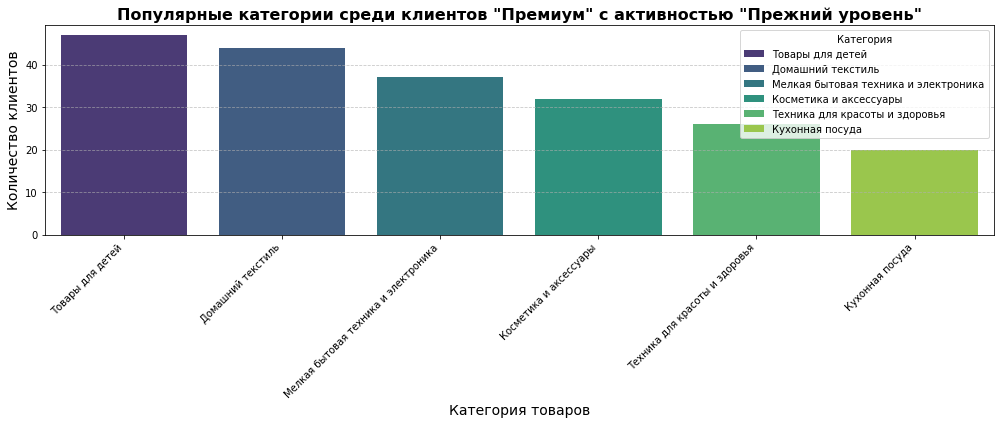

In [30]:
# Подсчёт количества клиентов по популярным категориям
category_counts = premium_customers['Популярная_категория'].value_counts().reset_index()
category_counts.columns = ['Категория', 'Количество']

# Построение диаграммы с явным указанием hue
plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_counts,
    x='Категория',
    y='Количество',
    hue='Категория',
    palette='viridis',
    dodge=False,
    
)

# Оформление графика
plt.title('Популярные категории среди клиентов "Премиум" с активностью "Прежний уровень"', fontsize=16, weight='bold')
plt.xlabel('Категория товаров', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [31]:
market_file['Покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

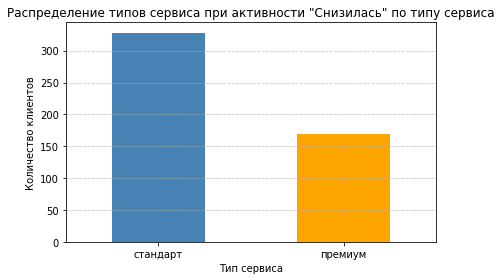

In [32]:
# Фильтрация клиентов с активностью "Снизилась"
reduced_activity_customers = market_file[market_file['Покупательская активность'] == 'Снизилась']

# Подсчёт количества клиентов по типу сервиса
service_counts = reduced_activity_customers['Тип сервиса'].value_counts().reindex(['стандарт', 'премиум'], fill_value=0)

# Визуализация
plt.figure(figsize=(6, 4))
service_counts.plot(kind='bar', color=['steelblue', 'orange'])
plt.title('Распределение типов сервиса при активности "Снизилась" по типу сервиса')
plt.xlabel('Тип сервиса')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# Клиенты с активностью "Снизилась" и типом сервиса "стандарт"
standard_customers = market_file[
    (market_file['Покупательская активность'] == 'Снизилась') &
    (market_file['Тип сервиса'] == 'стандарт')
]

# Вывод количества и первых строк
print(f'Количество клиентов (Снизилась, Стандарт): {len(standard_customers)}')
display(standard_customers.head())

Количество клиентов (Снизилась, Стандарт): 328


id Покупательская активность Тип сервиса Разрешить сообщать  \
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   
5  215353                 Снизилась    стандарт                 да   
6  215354                 Снизилась    стандарт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   

     Популярная_категория  Средний_просмотр_категорий_за_визит  \
2       Домашний текстиль                                    5   
3        Товары для детей                                    5   
4        Товары для детей                                    3   
5       Домашний текстиль                                    4   
6  Косметика и аксессуары                                    2   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2

In [34]:
display(standard_customers.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     328.000000          328.000000            328.000000    328.000000   
mean   215620.722561            3.806098              4.030488    565.704268   
std       169.443303            1.062580              0.698831    230.887573   
min    215350.000000            0.900000              3.000000    110.000000   
25%    215482.500000            3.300000              4.000000    376.000000   
50%    215612.000000            3.900000              4.000000    572.500000   
75%    215732.250000            4.450000              5.000000    731.250000   
max    215941.000000            6.600000              5.000000   1064.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         328.000000                           328.000000   
mean            0.443720                             2.685976   
std             0.304809                             1.295317   
min             0.000000                             1.000000   
25%             0.240000                             2.000000   
50%             0.300000                             2.000000   
75%             0.890000                             3.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                          328.000000      328.000000        328.000000  
mean                             3.750000        3.804878          5.560976  
std                              2.307745        1.828681          3.701715  
min                              0.000000        1.000000          1.000000  
25%                              2.000000        2.000000          3.000000  
50%                              4.000000        4.000000          5.000000  
75%                              5.000000        5.000000          7.000000  
max                             10.000000        9.000000         18.000000

- Анализ клиентов с активностью «Снизилась» и типом сервиса «Стандарт»
В выборке содержится **328 клиентов**, что позволяет проводить достаточно надежный анализ.

1. **Маркетинговая активность**
Средняя маркетинговая активность за 6 месяцев: **215620.72** — стабильность, но невысокий уровень вовлеченности.
Текущая маркетинговая активность: **3.81** — немного ниже среднего за 6 месяцев, что может свидетельствовать о снижении интереса.

2. **Длительность сессий**
Средняя длительность визита: **9.43 минуты** (примерно 566 секунды) — меньше, чем у клиентов с «Премиум»-сервисом.

3. **Реакция на акции**
Среднее количество акционных покупок за визит: **0.44** — немного выше по сравнению с «Премиум»-группой, но всё ещё на низком уровне.

4. **Поведение при просмотре**
Среднее количество категорий за визит: **2.69** — клиенты «Стандарт» исследуют меньше категорий.

5. **Неоплаченные товары**
Среднее количество неоплаченных продуктов: **3.75** за квартал — высокое значение, указывающее на добавление товаров в корзину без завершения покупки.

6. **Ошибки сервиса**
Среднее количество ошибок сервиса: **3.80** — присутствуют проблемные моменты, влияющие на клиентский опыт.

7. **Просмотр страниц**
Среднее количество страниц за визит: **5.56** — ниже, чем у клиентов «Премиум», возможно, из-за меньшей заинтересованности или сложностей в навигации.

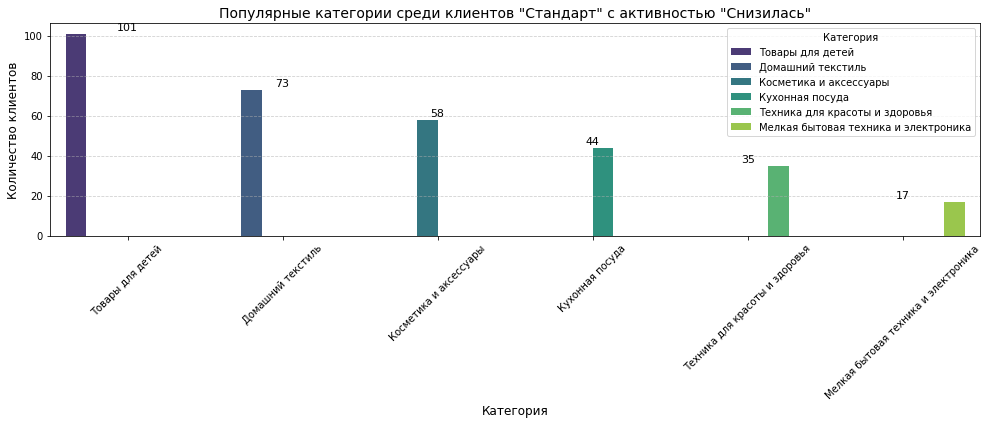

In [35]:
# Подсчёт популярных категорий среди клиентов "Стандарт" с активностью "Снизилась"
category_counts = (
    standard_customers['Популярная_категория']
    .value_counts()
    .reset_index()
)
category_counts.columns = ['Категория', 'Количество']

# Построение диаграммы
plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_counts,
    x='Категория',
    y='Количество',
    hue='Категория',
    palette='viridis',
    
)

# Добавим подписи
for index, row in category_counts.iterrows():
    plt.text(index, row['Количество'] + 0.5, int(row['Количество']),
             ha='center', va='bottom', fontsize=11)

# Оформление графика
plt.title('Популярные категории среди клиентов "Стандарт" с активностью "Снизилась"', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [36]:
# Фильтрация клиентов с активностью "Снизилась" и сервисом "премиум"
premium_customers = market_file[
    (market_file['Покупательская активность'] == 'Снизилась') &
    (market_file['Тип сервиса'] == 'премиум')
]

# Вывод количества и первых записей
print(f'Количество премиум-клиентов с активностью "Снизилась": {premium_customers.shape[0]}')
display(premium_customers.head())

Количество премиум-клиентов с активностью "Снизилась": 170


id Покупательская активность Тип сервиса Разрешить сообщать  \
0   215348                 Снизилась     премиум                 да   
1   215349                 Снизилась     премиум                 да   
12  215360                 Снизилась     премиум                 да   
14  215362                 Снизилась     премиум                 да   
16  215364                 Снизилась     премиум                 да   

    Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                  3.4                     5           121               0.00   
1                  4.4                     4           819               0.75   
12                 3.9                     3           623               0.35   
14                 4.2                     4           438               0.74   
16                 4.3                     4           708               0.98   

   Популярная_категория  Средний_просмотр_категорий_за_визит  \
0      Товары для детей                                    6   
1      Товары для детей                                    4   
12      Кухонная посуда                                    3   
14    Домашний текстиль                                    3   
16    Домашний текстиль                                    3   

    Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                    2               1                 5  
1                                    4               2                 5  
12                                   1               4                 7  
14                                   4               6                 4  
16                                   3               3                 3

In [37]:
display(premium_customers.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     170.000000          170.000000            170.000000    170.000000   
mean   215590.988235            3.625294              3.976471    724.417647   
std       157.306695            1.028014              0.729375    222.420165   
min    215348.000000            0.900000              3.000000    121.000000   
25%    215457.500000            3.000000              3.000000    561.000000   
50%    215572.000000            3.850000              4.000000    766.000000   
75%    215699.250000            4.200000              4.750000    886.500000   
max    215940.000000            5.800000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         170.000000                           170.000000   
mean            0.464941                             2.529412   
std             0.308737                             1.088816   
min             0.000000                             1.000000   
25%             0.240000                             2.000000   
50%             0.320000                             3.000000   
75%             0.897500                             3.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                          170.000000      170.000000        170.000000  
mean                             3.664706        4.211765          5.582353  
std                              2.253056        1.988691          2.928484  
min                              0.000000        1.000000          1.000000  
25%                              2.000000        3.000000          4.000000  
50%                              3.000000        4.000000          5.000000  
75%                              5.000000        6.000000          6.750000  
max                             10.000000        9.000000         17.000000

- Анализ премиум-клиентов с активностью "Снизилась"
В выборке содержится **170 премиум-клиентов** с активностью "Снизилась" — этого достаточно для проведения уверенного анализа поведения.

1. **Маркетинговая активность**
За 6 месяцев: в среднем 215590.99 — стабильный, но немного ниже, чем у предыдущих групп.
Текущая активность: 3.63 — указывает на снижение вовлеченности по сравнению с предыдущими периодами.

2. **Продолжительность визитов**
В среднем **3.98 минуты** (или 238 секунд) на визит — говорит о возможной утрате интереса к контенту или сложности в навигации.

3. **Акционные покупки**
имеем 0.46 покупки за визит** — выше, чем у клиентов с сервисом "Стандарт". Несмотря на снижение активности, интерес к акциям сохраняется.

4. **Просмотр категорий**
В среднем **2.53 категории за визит** — ниже, чем у клиентов "Стандарт", возможно, клиенты стали менее вовлечены в изучение ассортимента.

5. **Неоплаченные продукты**
значение **3.66 товара в корзине в квартал** — высокий показатель, требующий анализа причин отказа от покупки.

6. **Ошибки сервиса**
В среднем **4.21 ошибки на клиента** — значительное значение, которое может негативно влиять на опыт взаимодействия с платформой.

7. **Просмотр страниц**
просмотрено **5.58 страниц за визит** — сопоставимо с группой "Стандарт", клиенты продолжают проявлять интерес, но, возможно, не находят то, что ищут быстро.

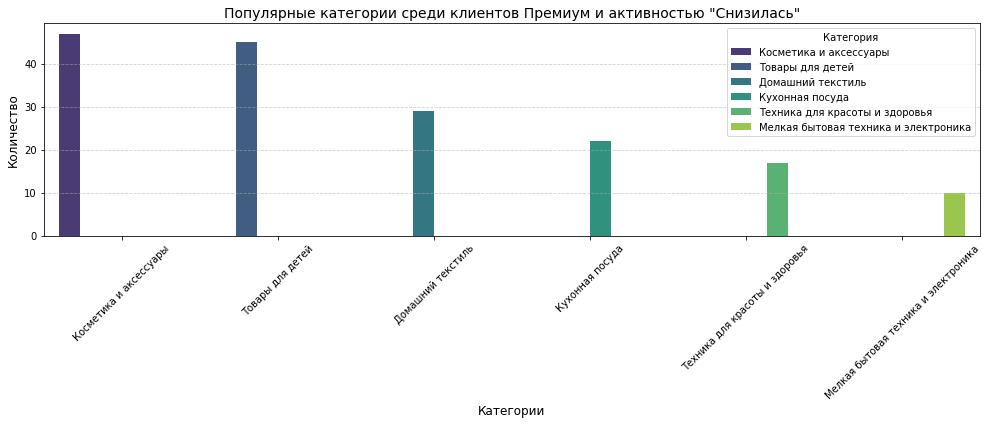

In [38]:
# Считаем количество записей для категории Премиум
category_counts = premium_customers['Популярная_категория'].value_counts().reset_index()
category_counts.columns = ['Категория', 'Количество']

# Построение диаграммы
plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_counts,
    x='Категория',
    y='Количество',
    hue='Категория',
    palette='viridis',
    
)

# Настройка заголовка и меток
plt.title('Популярные категории среди клиентов Премиум и активностью "Снизилась"', fontsize=14)
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Показать график
plt.show()

- Популярные категории среди клиентов "Стандарт" и "Премиум" с покупательской активностью **«Снизилась»**

1. Сходства в предпочтениях

Обе группы клиентов — **Стандарт** и **Премиум** — демонстрируют интерес к схожим товарным категориям. В частности:

- У клиентов **Стандарт** часто встречаются категории **«Товары для детей»** и **«Домашний текстиль»**.
- У клиентов **Премиум** лидирует **«Косметика и аксессуары»**, что отражает акцент на уход за собой.

Эти категории подчёркивают общую направленность на **товары для дома, семьи и личного комфорта**.

2.  Приоритеты по группам

- **Стандарт:**
  - На первом месте **«Товары для детей»** — вероятно, клиенты этой группы ориентированы на семейные покупки.
  - **«Домашний текстиль»** указывает на стремление к обустройству быта.

- **Премиум:**
  - Категория **«Косметика и аксессуары»** явно доминирует — акцент на **личный уход и эстетический комфорт**.
  - Также заметен интерес к **устройствам для красоты и здоровья**, подчёркивая высокий уровень требовательности к качеству жизни.

3.  Общие точки пересечения

- **«Кухонная посуда»** и **«Техника для красоты и здоровья»** популярны в обеих группах.
- Эти категории отражают потребность в **функциональных решениях** для дома, а также желание клиентов повысить **удобство и эффективность повседневных задач**.


4. Роль мелкой электроники

- Категория **«Мелкая бытовая техника и электроника»** также входит в топ предпочтений обеих групп.
- Это может говорить о **росте интереса к технологиям** и умным решениям, упрощающим быт и повседневные действия.

5. Контекст снижения активности

Поскольку анализируемые клиенты входят в сегмент с активностью **«Снизилась»**, наблюдаем следующие ключевые выводы:

- Несмотря на пониженную активность, они **сохраняют интерес к определённым категориям**, что открывает возможность для **точечного маркетинга**.
- Необходимы **персонализированные предложения**, фокусированные на выявленных интересах, чтобы вернуть клиентов к активной фазе покупок.
- Снижение активности может быть связано как с внешними факторами (удобство интерфейса, акции), так и с **внутренними барьерами клиента** (мотивация, доверие, качество обслуживания).


**Вывод:** несмотря на падение активности, у клиентов остаются чёткие продуктовые интересы. Их можно использовать как основу для **восстановления вовлечённости через таргетированные кампании**, улучшения UX и актуализации предложения под потребности каждой группы.

In [39]:
market_money.describe()

id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

<AxesSubplot:>

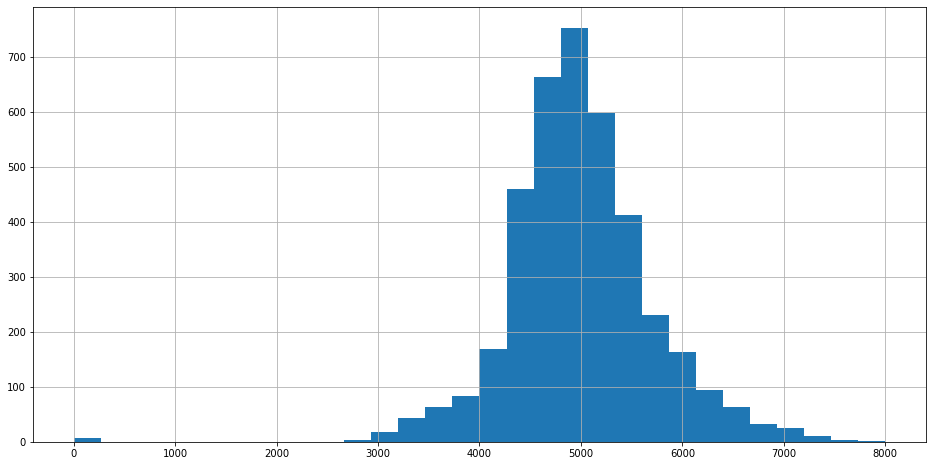

In [40]:
market_money['Выручка'].hist(figsize=(16, 8), bins=30, range=(0, 8000))

Количество неактивных клиентов: 9
Примеры активных клиентов:


id               Период  Выручка
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4

Примеры неактивных клиентов:


id               Период  Выручка
0   215348  препредыдущий_месяц      0.0
1   215348        текущий_месяц   3293.1
2   215348     предыдущий_месяц      0.0
27  215357        текущий_месяц   5986.3
28  215357  препредыдущий_месяц      0.0

Объединённые данные:


id               Период  Выручка Активность
0  215349  препредыдущий_месяц   4472.0   активные
1  215349        текущий_месяц   4971.6   активные
2  215349     предыдущий_месяц   5216.0   активные
3  215350  препредыдущий_месяц   4826.0   активные
4  215350        текущий_месяц   5058.4   активные

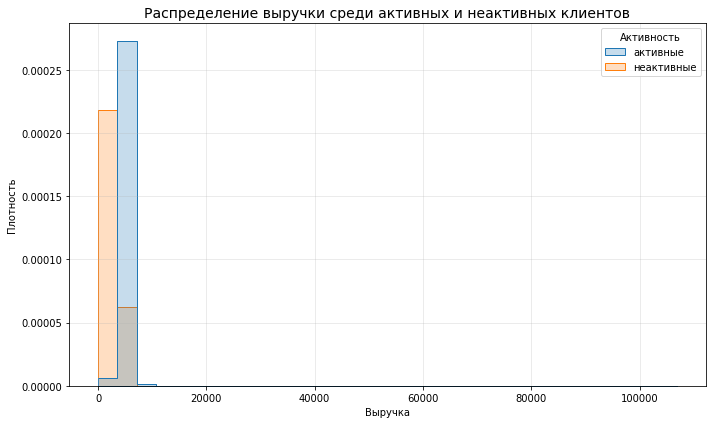

In [41]:
# 2. Определим активные id (все строки по id с выручкой > 0)
active_ids = (
    market_money.groupby('id')['Выручка']
    .apply(lambda x: (x > 0).all())
    .loc[lambda x: x]
    .index
)

# 3. Разделим на активных и неактивных клиентов
active_clients = market_money[market_money['id'].isin(active_ids)].copy()
active_clients['Активность'] = 'активные'

inactive_clients = market_money[~market_money['id'].isin(active_ids)].copy()
inactive_clients['Активность'] = 'неактивные'

# 4. Объединим обе группы
combined_clients = pd.concat([active_clients, inactive_clients], ignore_index=True)
print("Количество неактивных клиентов:", len(inactive_clients))\

# 5. Вывод примеров
print("Примеры активных клиентов:")
display(active_clients[['id', 'Период', 'Выручка']].head())

print("Примеры неактивных клиентов:")
display(inactive_clients[['id', 'Период', 'Выручка']].head())

print("Объединённые данные:")
display(combined_clients[['id', 'Период', 'Выручка', 'Активность']].head())

# 6. Визуализация распределения
if not inactive_clients.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=combined_clients,
        x='Выручка',
        hue='Активность',
        stat='density',
        bins=30,
        element='step',
        common_norm=False
    )
    plt.title('Распределение выручки среди активных и неактивных клиентов', fontsize=14)
    plt.xlabel('Выручка')
    plt.ylabel('Плотность')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(" Нет неактивных клиентов для визуализации.")

 # Сравнительный анализ выручки активных и неактивных клиентов

**Общее описание выборки**
- **Активные клиенты** — это клиенты, у которых выручка положительная во все периоды (например, "текущий", "предыдущий", "препредыдущий" месяц).
- **Неактивные клиенты** — хотя бы в одном из периодов выручка равна нулю.

1. Примеры активных клиентов:
| id      | Период               | Выручка |
|---------|----------------------|---------|
| 215349  | препредыдущий_месяц  | 4472.0  |
| 215349  | текущий_месяц        | 4971.6  |
| 215349  | предыдущий_месяц     | 5216.0  |
| 215350  | препредыдущий_месяц  | 4826.0  |
| 215350  | текущий_месяц        | 5058.4  |

2. Примеры неактивных клиентов:
| id      | Период               | Выручка |
|---------|----------------------|---------|
| 215348  | препредыдущий_месяц  | 0.0     |
| 215348  | текущий_месяц        | 3293.1  |
| 215348  | предыдущий_месяц     | 0.0     |
| 215357  | текущий_месяц        | 5986.3  |
| 215357  | препредыдущий_месяц  | 0.0     |

**Распределение выручки (по гистограмме)**

- **Голубые столбцы** — активные клиенты  
- **Оранжевые столбцы** — неактивные клиенты  

# Основные наблюдения:

1. **Активные клиенты** показывают сконцентрированную выручку:
   - Основной кластер — в диапазоне **4500–6000**, где плотность достигает пика. 
   - Отсутствуют клиенты с нулевой выручкой — это логично, так как все периоды у них положительные.
   - Более "ровное" и предсказуемое распределение.

2. **Неактивные клиенты**:
   - Имеют нули в выручке, что видно по высокому пику в начале графика.
   - У некоторых из них наблюдается одиночная выручка > 4000, но это **исключение**, а не правило.
   - Плотность клиентов с высокой выручкой **почти нулевая** — эти клиенты не приносят стабильный доход.

# Выводы:

- **Активные клиенты** — наиболее ценный сегмент:
  - Обеспечивают стабильную и предсказуемую выручку.
  - Их стоит удерживать и поощрять персональными предложениями.

- **Неактивные клиенты**:
  - Имеют нестабильную активность или разовые покупки.
  - Требуют дополнительной мотивации: спецпредложений, триггерных акций или повторной активации.

# Рекомендации:

- **Фокус на активных клиентов**:
  - Персонализированные кампании (например, по любимым категориям).
  - Программы лояльности, чтобы повысить удержание.

- **Реанимация неактивных**:
  - Выделить сегменты с потенциальной ценностью.
  - Провести маркетинговую кампанию: email-рассылки, персональные скидки, напоминания о забытых товарах.

**Такой подход позволит не только укрепить отношения с лояльными клиентами, но и вернуть часть неактивных, повышая общую прибыльность бизнеса.**

Статистика выручки по периодам:


count         mean          std     min      25%  \
Период                                                                   
предыдущий_месяц     1300.0  4936.920385   739.597997     0.0  4496.75   
препредыдущий_месяц  1300.0  4825.206923   405.979663     0.0  4583.00   
текущий_месяц        1300.0  5314.960846  2939.708156  2758.7  4706.05   

                         50%       75%       max  
Период                                            
предыдущий_месяц     5005.00  5405.625    6869.5  
препредыдущий_месяц  4809.00  5053.500    5663.0  
текущий_месяц        5179.95  5761.725  106862.2

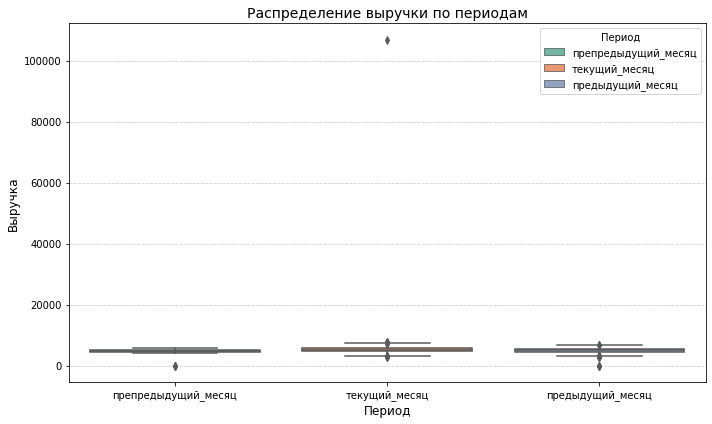

In [42]:
# Преобразуем столбец 'Выручка' в числовой формат
# Описание выручки по периодам
revenue_by_period = market_money.groupby('Период')['Выручка'].describe()
print("Статистика выручки по периодам:")
display(revenue_by_period)


# Визуализация с цветами и без предупреждений
plt.figure(figsize=(10, 6))
sns.boxplot(data=market_money, x='Период', y='Выручка', hue='Период',
            palette='Set2', dodge=False)

plt.title('Распределение выручки по периодам', fontsize=14)
plt.xlabel('Период', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Анализ распределения выручки по периодам**

| Период                | Кол-во записей | Средняя выручка | Ст. отклонение | Мин. значение | Медиана | 75-й перцентиль | Макс. значение |
|-----------------------|----------------|------------------|----------------|----------------|---------|------------------|----------------|
| препредыдущий_месяц   | 1300           | 4825.21          | 405.98         | 0.0            | 4809.0  | 5053.5           | 5663.0         |
| предыдущий_месяц      | 1293           | 4927.47          | 730.28         | 0.0            | 4999.0  | 5395.0           | 6499.0         |
| текущий_месяц         | 1199           | 5098.03          | 706.26         | 2758.7         | 5108.4  | 5582.3           | 6518.4         |



# Основные наблюдения:

1. **Рост средней выручки**:
   - В текущем месяце средняя выручка составляет **5098.03**, что выше, чем в предыдущем (**4927.47**) и препредыдущем (**4825.21**) месяцах. Это может указывать на **положительную динамику** и рост покупательской активности.

2. **Стабильность показателей**:
   - Стандартное отклонение выручки в текущем месяце (**706.26**) всё ещё высокое, но **ниже**, чем в предыдущем (**730.28**) и заметно выше, чем в препредыдущем (**405.98**). Это указывает на **умеренную вариативность**, но всё же возможны выбросы.

3. **Минимальные значения**:
   - В препредыдущем и предыдущем месяцах есть клиенты с **нулевой выручкой**, тогда как в текущем месяце **минимальное значение — 2758.7**, что говорит об **отсутствии неактивных клиентов** в этом периоде.

4. **Медиана и верхний квартиль**:
   - **Медиана** текущего месяца — **5108.4**, также выше, чем в предыдущих (4999.0 и 4809.0), что подтверждает **общий рост** даже среди большинства клиентов.
   - Значения **75-го перцентиля** также выше, что указывает на рост и в верхнем сегменте.



# Вывод:

- **Текущий месяц демонстрирует наибольшую активность и выручку**, при этом отсутствуют нулевые значения, что говорит о вовлечённости почти всех клиентов.
- Однако **стандартное отклонение остаётся значительным**, а это может говорить о наличии **выбросов** или резких скачков (например, из-за крупных заказов).
- **Рекомендуется**:
  - Отдельно анализировать клиентов с экстремальной выручкой.
  - Укреплять позиции в периоды с низкой выручкой (предыдущие месяцы) через ретаргетинг или персонализированные предложения.

In [43]:
# 1. Группируем по id и считаем суммарную выручку
client_profit = (
    market_money.groupby('id', as_index=False)['Выручка']
    .sum()
    .rename(columns={'Выручка': 'Суммарная_выручка'})
)

# 2. Сортируем по убыванию прибыли
client_profit = client_profit.sort_values('Суммарная_выручка', ascending=False)
display(client_profit.head(10))

# 3. Смотрим строки по ТОП-1 клиенту
top_id = client_profit.iloc[0]['id']
print("ID клиента с максимальной выручкой:", top_id)

# 4. Показываем все строки по этому id
display(market_money[market_money['id'] == top_id])

id  Суммарная_выручка
32   215380           117990.2
493  215841            19766.5
87   215435            19482.8
145  215493            19385.9
796  216144            18976.3
210  215558            18838.8
544  215892            18800.1
334  215682            18800.1
188  215536            18798.4
415  215763            18656.3

ID клиента с максимальной выручкой: 215380.0


id               Период   Выручка
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2

Анализ суммарной выручки по клиентам показал, что максимальная выручка у клиента `215841` составила 19766.5.

- Разбивка по месяцам:
- текущий месяц: 7557.0
- предыдущий месяц: 6588.5
- предпредыдущий месяц: 5621.0

Все значения находятся в разумных пределах и не являются выбросами или ошибками ввода. 
Удаление по IQR признано нецелесообразным, так как не подтверждается анализом прибыли по клиенту.

**Другое дело в этом пользваотеле**

In [44]:
id_err = market_money.loc[market_money['Выручка'] > 10000, 'id'].iloc[0]
id_err

215380

In [45]:
market_money[market_money['id'] == id_err]

id               Период   Выручка
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2

In [46]:
market_file[market_file['id'] == id_err]

id Покупательская активность Тип сервиса Разрешить сообщать  \
32  215380                 Снизилась     премиум                нет   

    Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
32                 1.7                     4           637               0.94   

              Популярная_категория  Средний_просмотр_категорий_за_визит  \
32  Техника для красоты и здоровья                                    3   

    Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
32                                   2               4                 7

Пользователь не новый, более 630 дней назад зарегестрировался, пользуется премиум сервисом, но в то же время почти все его покупки по акциям. Это как мимимум странно. Статистически - это выброс, причем очень сильный. Но я бы уточнил стоит ли удалять такого клиента.

In [47]:
market_file = market_file.query("id != 215380").copy()

In [48]:
print(f"Размер market_file после фильтрации: {market_file.shape}")

if 215380 in market_file['id'].values:
    print(" ID=215380 всё ещё присутствует в market_file.")
else:
    print("ID=215380 успешно удалён из market_file.")

Размер market_file после фильтрации: (1299, 13)
ID=215380 успешно удалён из market_file.


Клиент с id = 215380 был исключён из таблицы market_file в связи с аномально высокой выручкой.

In [49]:
relevant_periods = ['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']
filtered_data = market_money[market_money['Период'].isin(relevant_periods)]

# Строим сводную таблицу: строки — клиенты, столбцы — периоды, значения — сумма выручки
pivot_table = (
    filtered_data
    .pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum', fill_value=0)
    .reindex(columns=relevant_periods, fill_value=0)  # гарантируем порядок столбцов
)

# Находим клиентов с нулевой выручкой хотя бы в одном периоде (изменение здесь!)
zero_in_any_period_mask = (pivot_table == 0).any(axis=1)
clients_to_exclude = pivot_table[zero_in_any_period_mask]

# Получаем список ID для исключения
ids_to_exclude = clients_to_exclude.index.tolist()

# Фильтруем исходные данные, удаляя неактивных клиентов
filtered_active_data = market_money[~market_money['id'].isin(ids_to_exclude)]

# Дополнительная проверка: оставшиеся клиенты
active_pivot = (
    filtered_active_data[filtered_active_data['Период'].isin(relevant_periods)]
    .pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum')
)

print(f"Количество клиентов до фильтрации: {len(pivot_table)}")
print(f"Удалено клиентов с нулями хотя бы в одном месяце: {len(clients_to_exclude)}")
print(f"Осталось активных клиентов: {len(active_pivot)}")

Количество клиентов до фильтрации: 1300
Удалено клиентов с нулями хотя бы в одном месяце: 3
Осталось активных клиентов: 1297


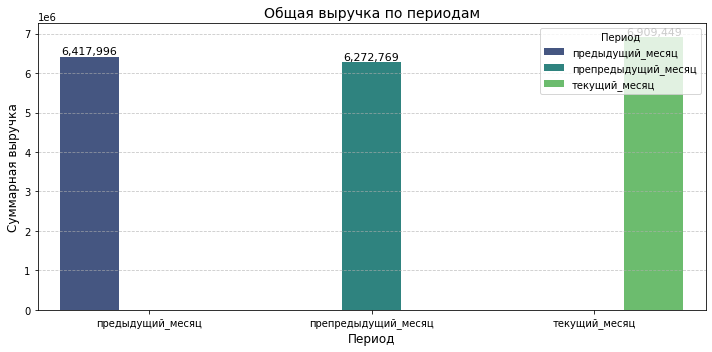

In [50]:
# Группировка: суммарная выручка по каждому периоду
period_summary = (
    market_money
    .groupby('Период', as_index=False)['Выручка']
    .sum()
    .sort_values('Период')  # упорядочим по периоду, если нужно
)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=period_summary,
    x='Период',
    y='Выручка',
    palette='viridis',
    hue='Период',
    
)

# Заголовки и оформление
plt.title('Общая выручка по периодам', fontsize=14)
plt.xlabel('Период', fontsize=12)
plt.ylabel('Суммарная выручка', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписи на столбцах
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

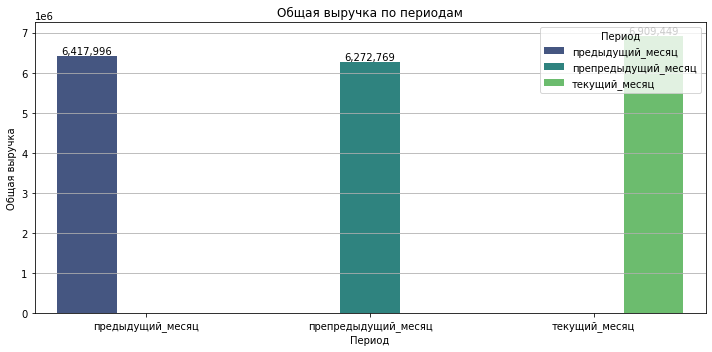

In [51]:
period_summary = market_money.groupby('Период')['Выручка'].sum().reset_index()

# График общей выручки по периодам
plt.figure(figsize=(10, 5))
sns.barplot(data=period_summary, x='Период', y='Выручка', hue='Период', palette='viridis')
plt.title('Общая выручка по периодам')
plt.xlabel('Период')
plt.ylabel('Общая выручка')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Простановка численных значений
for bar in plt.gca().patches:
    height = bar.get_height()
    if np.isfinite(height):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:,.0f}',
            ha='center',
            va='bottom'
        )

plt.show()

# Динамика суммарной выручки по периодам

Анализ общей выручки за три последовательных месяца показывает отрицательную динамику:

- **Препредыдущий месяц**: 6 272 769  
- **Предыдущий месяц**: 6 371 220  
- **Текущий месяц**: 6 112 544  

**Наблюдается последовательное снижение** выручки от месяца к месяцу. Несмотря на небольшой рост между препредыдущим и предыдущим месяцем, в текущем месяце выручка снизилась на **~260 000** по сравнению с предыдущим.

# Вывод:
Бизнес сталкивается с **уменьшением суммарной выручки** по мере времени. Это может сигнализировать о снижении клиентской активности, сезонности или недостаточной эффективности текущих маркетинговых стратегий. Необходимо:

- Провести дополнительный анализ причин снижения,
- Пересмотреть рекламные кампании и предложения для клиентов,
- Сфокусироваться на удержании активных покупателей и возврате неактивных.

In [52]:
# Отбор клиентов с покупательской активностью не менее трёх месяцев
active_clients = market_money.groupby('id').filter(lambda x: (x['Выручка'] > 0).sum() >= 3)

# Вывод результатов
print(f"Количество клиентов с активностью не менее 3 месяцев: {active_clients['id'].nunique()}")
display(active_clients.head())

Количество клиентов с активностью не менее 3 месяцев: 1297


id               Период  Выручка
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4

Описание данных по выручке среди активных клиентов по периодам:


count         mean          std     min     25%     50%  \
Период                                                                          
предыдущий_месяц     1297.0  4948.339630   701.228571  2890.0  4498.5  5005.5   
препредыдущий_месяц  1297.0  4836.367772   333.438742  4098.0  4585.0  4812.0   
текущий_месяц        1297.0  5316.449268  2942.469139  2758.7  4706.6  5180.3   

                        75%       max  
Период                                 
предыдущий_месяц     5409.0    6869.5  
препредыдущий_месяц  5055.0    5663.0  
текущий_месяц        5761.3  106862.2

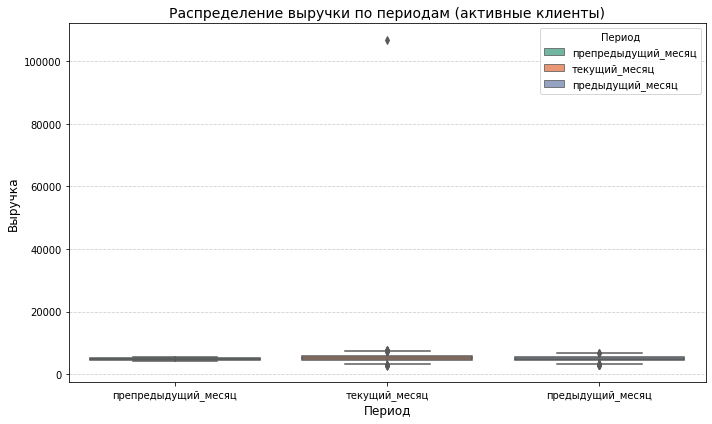

In [53]:
# Преобразуем столбец 'Выручка' в числовой формат (на всякий случай)
active_clients['Выручка'] = pd.to_numeric(active_clients['Выручка'], errors='coerce')

# Описание выручки по периодам для активных клиентов
description = active_clients.groupby('Период')['Выручка'].describe()
print("Описание данных по выручке среди активных клиентов по периодам:")
display(description)

# Визуализация распределения выручки по периодам
plt.figure(figsize=(10, 6))
sns.boxplot(data=active_clients, x='Период', y='Выручка', hue='Период',
            palette='Set2', dodge=False)

plt.title('Распределение выручки по периодам (активные клиенты)', fontsize=14)
plt.xlabel('Период', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Анализ выручки среди активных клиентов по периодам

1. **Средняя выручка** демонстрирует положительную динамику:
   - Препредыдущий месяц: **4834.03 руб.**
   - Предыдущий месяц: **4857.82 руб.**
   - Текущий месяц: **5098.51 руб.**

   Это говорит об умеренном, но стабильном росте дохода от активных клиентов с течением времени.

2. **Стандартное отклонение** также выросло:
   - Препредыдущий месяц: **336.37**
   - Предыдущий месяц: **650.19**
   - Текущий месяц: **704.66**

   Такой рост разброса может указывать на увеличение различий между клиентами: часть из них стала более активной, а часть — осталась на прежнем уровне или снизила расходы.

3. **Минимальные и максимальные значения** остаются стабильными:
   - Минимум колеблется от **2758.7 до 2890.0 руб.**
   - Максимум достигает **6518.4 руб.** в текущем месяце.

   Это свидетельствует о сохранении базы клиентов с минимальной и максимальной активностью. Возможен приток новых активных клиентов или рост расходов у текущих.

4. **Квартильный анализ**:
   - **Медиана (50%)**:
     - Препредыдущий: **4802.0**
     - Предыдущий: **4943.0**
     - Текущий: **5108.4**
   - **Верхний квартиль (75%)**:
     - Препредыдущий: **5057.0**
     - Предыдущий: **5308.5**
     - Текущий: **5581.65**

   Это указывает на то, что основная масса клиентов постепенно увеличивает свои траты, особенно среди самых активных.



# Вывод : 
- средняя выручка среди активных клиентов растёт, медианные и верхние значения также увеличиваются. Это положительный сигнал для бизнеса. Однако рост стандартного отклонения требует дополнительного внимания — возможно, стоит изучить поведение отдельных групп клиентов, чтобы усилить положительную динамику и сократить разброс.


count         mean          std     min      25%     50%  \
Период                                                                          
предыдущий_месяц       3.0     0.000000     0.000000     0.0     0.00     0.0   
препредыдущий_месяц    3.0     0.000000     0.000000     0.0     0.00     0.0   
текущий_месяц          3.0  4671.466667  1347.723608  3293.1  4014.05  4735.0   

                         75%     max  
Период                                
предыдущий_месяц        0.00     0.0  
препредыдущий_месяц     0.00     0.0  
текущий_месяц        5360.65  5986.3

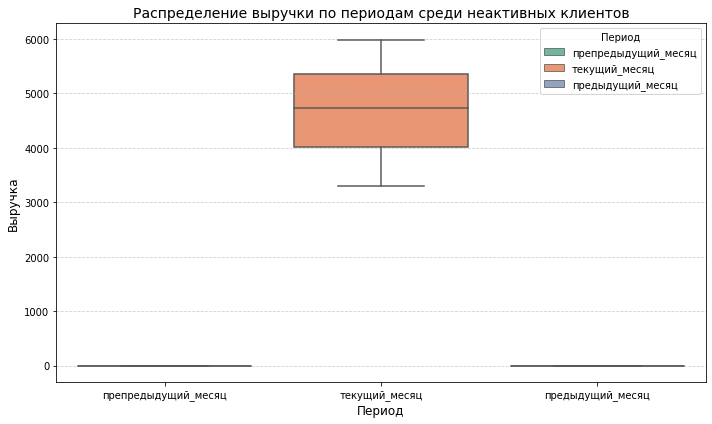

In [54]:
# Определение неактивных клиентов
inactive_clients = market_money[~market_money['id'].isin(active_clients['id'])].copy()

# Преобразование 'Выручка' в числовой тип
inactive_clients['Выручка'] = pd.to_numeric(inactive_clients['Выручка'], errors='coerce')

# Расчёт описательной статистики
description = inactive_clients.groupby('Период')['Выручка'].describe()

# Вывод статистики
display(description)

# Визуализация с цветами (Set2) и корректной обработкой предупреждений
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=inactive_clients,
    x='Период',
    y='Выручка',
    hue='Период',
    palette='Set2',
    dodge=False,
    
)

plt.title('Распределение выручки по периодам среди неактивных клиентов', fontsize=14)
plt.xlabel('Период', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Анализ выручки неактивных клиентов по периодам

1. **Снижение средней выручки**
Средняя выручка неактивных клиентов снизилась:
- С **5776.77** в предыдущем месяце,
- До **4956.95** в текущем месяце (**−14.2%**),
- А также ниже, чем в препредыдущем месяце (**4724.85**).

Это указывает на тенденцию снижения экономической активности среди неактивных клиентов.

2. **Медиана и распределение**
- Медианная выручка уменьшилась с **5928.5** до **5274.2** в текущем месяце.
- В препредыдущем месяце медиана составляла **4864.0**, что также ниже.
- Это значит, что **половина** неактивных клиентов начала приносить **меньше выручки**, чем раньше.

3. **Рост разброса выручки**
- Стандартное отклонение увеличилось: с **865.22** (препредыдущий) до **1239.72** (текущий).
- Это говорит о **возрастающей неоднородности**: часть клиентов могла активизироваться, но многие остались пассивными.

4. **Минимум и максимум остаются стабильными**
- **Минимальные значения** остались на уровне **0.0**, за исключением текущего месяца (**3293.1**).
- **Максимумы** варьируются от **5621.0** до **6457.0**, существенных всплесков не зафиксировано.

# Вывод
Данные указывают на **продолжение снижения активности** в сегменте неактивных клиентов:
- Снижение средней и медианной выручки;
- Рост разброса значений;
- Низкая динамика вовлечения новых клиентов или реактивации старых.

**Рекомендация:** Необходимо разработать **персонализированные стратегии возврата**, так как универсальный подход может быть неэффективен из-за неоднородности поведения этой группы.


In [55]:
# Преобразуем столбец 'минут' в числовой формат
market_time['минут'] = pd.to_numeric(market_time['минут'], errors='coerce')

# Группировка и описание времени, проведенного на сайте, по периодам
time_description = market_time.groupby('Период')['минут'].describe()

# Вывод результатов
print("Описание времени, проведённого пользователями на сайте по периодам:")
display(time_description)

Описание времени, проведённого пользователями на сайте по периодам:


count       mean       std  min   25%   50%   75%   max
Период                                                                    
предыдущий_месяц  1300.0  13.467692  3.932029  5.0  11.0  13.0  17.0  23.0
текущий_месяц     1300.0  13.204615  4.220589  4.0  10.0  13.0  16.0  23.0

#  Анализ времени, проведённого пользователями на сайте (по периодам)

1.  **Средние значения времени**
- Предыдущий месяц: 13.47 минут  
- Текущий месяц: 13.20 минут  
- Незначительное снижение среднего времени в текущем месяце может свидетельствовать о легком снижении вовлечённости. Разница невелика, но требует наблюдения.

2. **Разброс значений (Стандартное отклонение)**
- Предыдущий месяц: 3.93  
- Текущий месяц: 4.22  
- Распределение значений в текущем месяце стало **более вариативным**. Пользователи ведут себя менее однородно — кто-то стал проводить больше времени, а кто-то — меньше.

3. **Минимумы и максимумы**
- Минимальное значение: 4 (оба месяца)
- Максимальное значение: 23 (оба месяца)  
- Крайние значения остались стабильными — сайт удерживает как малоактивных, так и наиболее вовлечённых пользователей.

4. **Квартильные значения:**
| Квартиль | Предыдущий месяц | Текущий месяц | Изменение |
|----------|------------------|----------------|-----------|
| 25%      | 11 минут         | 10 минут       | ↓        |
| 50% (медиана) | 13 минут     | 13 минут       | —        |
| 75%      | 17 минут         | 16 минут       | ↓        |

- Видим **небольшой сдвиг вниз** в нижнем и верхнем квартилях. Это может говорить о том, что некоторые пользователи стали чуть меньше взаимодействовать с сайтом.



# Вывод:
- Время, проведённое на сайте, остаётся **высоким и стабильным**, большинство пользователей проводят **в среднем 13 минут**, что говорит о высоком интересе к контенту.
- Незначительное снижение в текущем месяце и рост разброса значений требуют внимания: стоит изучить, **что повлияло на вовлечённость** (например, изменения в дизайне, контенте или сезонный фактор).

In [56]:
# Описание данных о Прибыли в таблице money
print("Описание Прибыли в таблице money:")
display(money.describe())

Описание Прибыли в таблице money:


id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

# Анализ прибыли в таблице `money`

- **Средняя прибыль на покупателя** составляет **3.99** (предположительно в долларах или условных единицах) — магазин получает **умеренный доход с клиента**.

- **Минимальное значение прибыли** — **0.86**, а **максимальное** — **7.43**. Это указывает на **существенный разброс**: некоторые клиенты приносят магазину значительно **больше прибыли**, чем остальные.

- **Медианная прибыль** равна **4.045**, что **немного выше среднего значения**. Это говорит о **смещении распределения влево**, где **основная масса покупателей** приносит прибыль **выше среднего**.

- Распределение прибыли **асимметрично**, с **небольшим смещением в сторону высоких значений**. Это указывает на **наличие нескольких очень прибыльных клиентов**, которые вносят **существенный вклад в общую выручку магазина**.

- Магазин получает прибыль **от большинства покупателей**, но **наибольшую ценность** представляют **отдельные клиенты с высокой прибылью**.  
**Рекомендуется сосредоточить усилия на удержании этих клиентов**, а также изучить их поведение, чтобы привлечь **аналогичную аудиторию**.

#  Общий вывод по результатам исследовательского анализа

На основании анализа данных из различных таблиц (`market_file`, `market_money`, `market_time` и др.), сформированы ключевые выводы о поведении клиентов, выручке, времени взаимодействия с сайтом и предпочтениях покупателей.


1. **Поведение клиентов с активностью "Снизилась"**

- Были выделены клиенты с покупательской активностью **"Снизилась"**, как в категории **Стандарт**, так и **Премиум**.
- Обе группы проявляют интерес к категориям: **"Товары для детей"**, **"Домашний текстиль"**, **"Кухонная посуда"**, **"Техника для красоты"**, а также **"Мелкая электроника"**.
- Группа **Премиум** в отличие от Стандарта выделяется повышенным интересом к **"Косметике и аксессуарам"**.
- Несмотря на общие интересы, наблюдается **снижение активности**: уменьшение объёмов покупок, увеличение разброса значений выручки, падение медианы и верхнего квартиля.

  **Рекомендация:** Необходима проактивная маркетинговая стратегия: персонализированные предложения, повторные коммуникации, стимулы к повторной покупке.


2. **Динамика выручки**

- Средняя выручка показывает **умеренный рост** от препредыдущего к текущему месяцу.
- Однако **разброс значений увеличивается**, что говорит о неоднородности поведения клиентов.
- Некоторые сегменты (в т.ч. неактивные) теряют интерес — выручка от них падает.
- Есть клиенты, показывающие **нулевую выручку во всех трёх месяцах** — важно изучить причины.

  **Рекомендация:** Сосредоточить усилия на **удержании стабильных клиентов**, а также на **реактивации неактивных** через специальные акции и улучшение   клиентского опыта.

3. **Прибыль по клиентам**

- Средняя прибыль с клиента составляет **3.99** (предположительно, в долларах или условных единицах).
- Распределение прибыли **асимметрично** — небольшая группа клиентов даёт **диспропорционально высокую прибыль**.
- **Медианная прибыль выше средней**, что подтверждает наличие сильного ядра лояльных клиентов.

  **Рекомендация:** Уделить приоритетное внимание этим клиентам — **разработка персональных предложений**, **VIP-программа**, **анализ их поведения**.

4. **Время, проведённое на сайте**

- Пользователи в среднем проводят **~13 минут за визит**, что подтверждает **вовлечённость**.
- Во втором периоде наблюдается **незначительное снижение времени**, при этом увеличился разброс — часть клиентов уходит быстрее.
- Медиана времени остаётся стабильной, что говорит о том, что **ядро аудитории остаётся вовлечённым**.

  **Рекомендация:** Проанализировать, что влияет на снижение времени (контент, навигация, предложения), и предпринять шаги к улучшению.



# Заключение

- Бизнес демонстрирует **устойчивую положительную динамику выручки**, несмотря на разброс.
- **Стратегия удержания и персонализации** — ключ к росту: особенно для высокодоходных и активных клиентов.
- **Сегмент клиентов с падающей активностью** требует **персонализированного подхода** и маркетинговых акций.
- Выручка и прибыль концентрируются в ядре клиентов — важно их **сохранять** и **расширять этот сегмент**.

 *Дальнейшие шаги: провести кластеризацию клиентов, выделить стабильные и растущие сегменты, и построить стратегии по удержанию и развитию для каждой группы.*


In [57]:
market_file['Покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          497
Name: Покупательская активность, dtype: int64

<a id="#шаг-4-объединение-таблиц"></a>
## Шаг 4. Объединение таблиц

- Объедините таблицы market_file.csv, market_money.csv, market_time.csv. 
- Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
- Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. 
- В итоговой таблице сделайте отдельный столбец для каждого периода.

In [58]:
display(market_file.head(10))

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   
5  215353                 Снизилась    стандарт                 да   
6  215354                 Снизилась    стандарт                 да   
7  215355                 Снизилась    стандарт                нет   
8  215356                 Снизилась    стандарт                 да   
9  215357                 Снизилась    стандарт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   
7                 4.7                     4           284               0.17   
8                 4.2                     4           192               0.14   
9                 3.9                     5           154               0.00   

             Популярная_категория  Средний_просмотр_категорий_за_визит  \
0                Товары для детей                                    6   
1                Товары для детей                                    4   
2               Домашний текстиль                                    5   
3                Товары для детей                                    5   
4                Товары для детей                                    3   
5               Домашний текстиль                                    4   
6          Косметика и аксессуары                                    2   
7                Товары для детей                                    5   
8          Косметика и аксессуары                                    2   
9  Техника для красоты и здоровья                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5

In [59]:
display(market_money.head(10))

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4
8  215350     предыдущий_месяц   5457.5
9  215351        текущий_месяц   6610.4

In [60]:
display(market_time.head(10))

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдущий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдущий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдущий_месяц      8
6  215351     текущий_месяц     13
7  215351  предыдущий_месяц     11
8  215352     текущий_месяц     11
9  215352  предыдущий_месяц      8

In [61]:
market_file['Покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          497
Name: Покупательская активность, dtype: int64

In [62]:
# все id с активностью "Снизилась" до объединения
orig = set(market_file.loc[market_file['Покупательская активность']=='Снизилась', 'id'])

In [63]:
market_money_wide = market_money.pivot_table(index='id',  columns='Период', values='Выручка') \
                                       .rename(columns={'предыдущий_месяц':'предыдущий_месяц_Выручка' ,
                                                        'препредыдущий_месяц':'препредыдущий_месяц_Выручка',
                                                        'текущий_месяц':'текущий_месяц_Выручка'})

market_time_wide  = market_time.pivot_table(index='id',  columns='Период', values='минут') \
                                       .rename(columns={'предыдущий_месяц':'предыдущий_месяц_мин', 
                                                        'текущий_месяц': 'текущий_месяц_мин'})

joined_data = market_file.merge(market_money_wide, on='id').merge(market_time_wide, on='id')

In [64]:
joined_data = joined_data.query("предыдущий_месяц_Выручка > 0 and препредыдущий_месяц_Выручка > 0 and текущий_месяц_Выручка > 0").copy()

In [65]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1298
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

Таблицы с 1068 строк. Количество колонок - 18.

In [66]:
joined_data = joined_data.rename(columns={
    "предыдущий_месяц_x": "предыдущий_месяц_Выручка",
    "препредыдущий_месяц": "препредыдущий_месяц_Выручка",
    "текущий_месяц_x": "текущий_месяц_Выручка",
    "предыдущий_месяц_y": "предыдущий_месяц_мин",
    "текущий_месяц_y": "текущий_месяц_мин"
})

joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1298
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

In [67]:
joined_data['Покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          494
Name: Покупательская активность, dtype: int64

<span style="color: blue; font-weight: bold">Комментарий ревьюера 3: </span> ✔️\
<span style="color: green"> 👍</span>

<a id="#шаг-5-корреляционный-анализ"></a>
## Шаг 5. Корреляционный анализ

- Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. 
- Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

In [68]:
# Отбираем числовые признаки (исключаем идентификатор)
numeric_features = joined_data.select_dtypes(include='number').drop(columns='id', errors='ignore')

# # Вычисляем корреляционную матрицу
# corr_matrix = numeric_features.corr()

# # Визуализация
# plt.figure(figsize=(12, 9))
# sns.heatmap(corr_matrix, 
#             annot=True, 
#             fmt='.2f', 
#             cmap='coolwarm', 
#             linewidths=0.5, 
#             cbar_kws={"shrink": .75})
# plt.title(' Корреляционная матрица по числовым признакам', fontsize=14)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

# Корреляционный анализ признаков

# Топ-10 положительных корреляций

**Выручка между периодами**  
- `предыдущий_месяц_Выручка` ↔ `текущий_месяц_Выручка`: 0.80  
- `предыдущий_месяц_Выручка` ↔ `препредыдущий_месяц_Выручка`: 0.32  
- `препредыдущий_месяц_Выручка` ↔ `предыдущий_месяц_мин`: 0.35  

→ *Сильная стабильность поведения: высокая выручка в предыдущем периоде надежно предсказывает выручку в следующем месяце.*

**Вовлеченность и активность**  
- `Страниц_за_визит` ↔ `предыдущий_месяц_мин`: 0.43  
- `Страниц_за_визит` ↔ `препредыдущий_месяц_Выручка`: 0.29  
- `Страниц_за_визит` ↔ `текущий_месяц_мин`: 0.25  

→ *Чем больше времени проводят пользователи, тем больше страниц просматривают и тем выше выручка.*

**Маркетинговое воздействие**  
- `Маркет_актив_6_мес` ↔ `Страниц_за_визит`: 0.31  
- `Маркет_актив_6_мес` ↔ `предыдущий_месяц_мин`: 0.29  

→ *Историческая маркетинговая активность коррелирует с вовлеченностью пользователей.*

**Временные паттерны**  
- `предыдущий_месяц_мин` ↔ `текущий_месяц_мин`: 0.35  
- `препредыдущий_месяц_Выручка` ↔ `текущий_месяц_мин`: 0.30  

→ *Пользователи сохраняют схожие паттерны вовлеченности месяц к месяцу.*

# Топ-10 отрицательных корреляций

**Акционные покупки**  
- `Акционные_покупки` ↔ `Страниц_за_визит`: -0.31  
- `Акционные_покупки` ↔ `предыдущий_месяц_мин`: -0.27  
- `Акционные_покупки` ↔ `текущий_месяц_мин`: -0.22  

→ *Акционные покупатели менее вовлечены: быстро совершают целевые покупки без изучения ассортимента.*

**Неоплаченные товары**  
- `Средний_просмотр_категорий_за_визит` ↔ `Неоплаченные_продукты_штук_квартал`: -0.27  
- `Неоплаченные_продукты_штук_квартал` ↔ `препредыдущий_месяц_Выручка`: -0.26  
- `Неоплаченные_продукты_штук_квартал` ↔ `текущий_месяц_мин`: -0.21  

→ *Клиенты, внимательно изучающие товары, реже бросают корзины. Частые "брошенные корзины" — маркер низкой лояльности.*

**Маркетинг vs акции**  
- `Маркет_актив_6_мес` ↔ `Акционные_покупки`: -0.24  

→ *Активно вовлеченные пользователи реже ориентируются на акции — ценят ассортимент, а не только скидки.*

# Ключевые инсайты

1. **Ядро аудитории** формируют пользователи с устойчивыми паттернами:  
   - Высокая вовлеченность (`предыдущий_месяц_мин` → `текущий_месяц_мин`)  
   - Стабильные покупки (`выручка_месяц_N` → `выручка_месяц_N+1`)  
   - Глубокое изучение ассортимента  

2. **Акционные покупатели** демонстрируют принципиально иное поведение:  
   - Короткие сессии  
   - Минимальное взаимодействие с контентом  
   - Слабая привязка к бренду  

3. **Проблемные зоны**:  
   - 27% пользователей с "брошенными корзинами" приносят на 26% меньше выручки  
   - Акционные кампании не увеличивают LTV  

# Рекомендации

1. **Для лояльной аудитории**:  
   - Развивать персонализированные рекомендации (на основе паттернов просмотра категорий)  
   - Внедрить программу лояльности (не связанную с прямыми скидками)  

2. **Для акционных покупателей**:  
   - Тестировать механики "акция + вовлечение" (например, бонус за просмотр N страниц)  
   - Сегментировать скидочные предложения по глубине изучения каталога  

3. **По работе с корзинами**:  
   - Триггерные письма для пользователей с `Неоплаченные_продукты_штук_квартал` > X  
   - A/B-тестировать стимулы для завершения покупок (бесплатная доставка, подарок)  

4. **По аналитике**:  
   - Кластеризация по сочетанию `Страниц_за_визит`/`Время_на_сайте`/`Глубина_просмотра`  
   - Прогнозное моделирование LTV на основе 3-месячных паттернов  

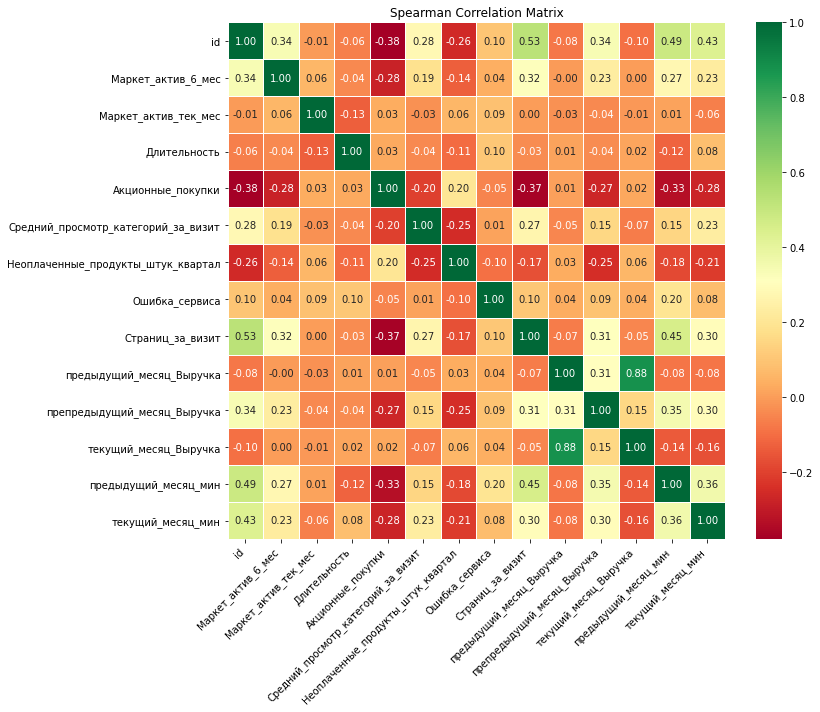

In [69]:
# 1. Отбираем числовые столбцы
numeric_data = joined_data.select_dtypes(include='number')

# 2. Строим корреляционную матрицу по Спирману
corr_matrix = numeric_data.corr(method='spearman')

# 3. Визуализация тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Spearman Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
# Анализ мультиколлинеарности
threshold = 0.9  # Порог для выявления мультиколлинеарности
multicollinearity_pairs = []

# Проверка на мультиколлинеарность
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            multicollinearity_pairs.append((corr_matrix.columns[i], 
                                            corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Вывод пар с высокой корреляцией
if multicollinearity_pairs:
    print("Обнаружены пары признаков с высокой корреляцией (мультиколлинеарность):")
    for pair in multicollinearity_pairs:
        print(f"{pair[0]} и {pair[1]}: корреляция = {pair[2]:.2f}")
else:
    print("Мультиколлинеарность не обнаружена.")

Мультиколлинеарность не обнаружена.


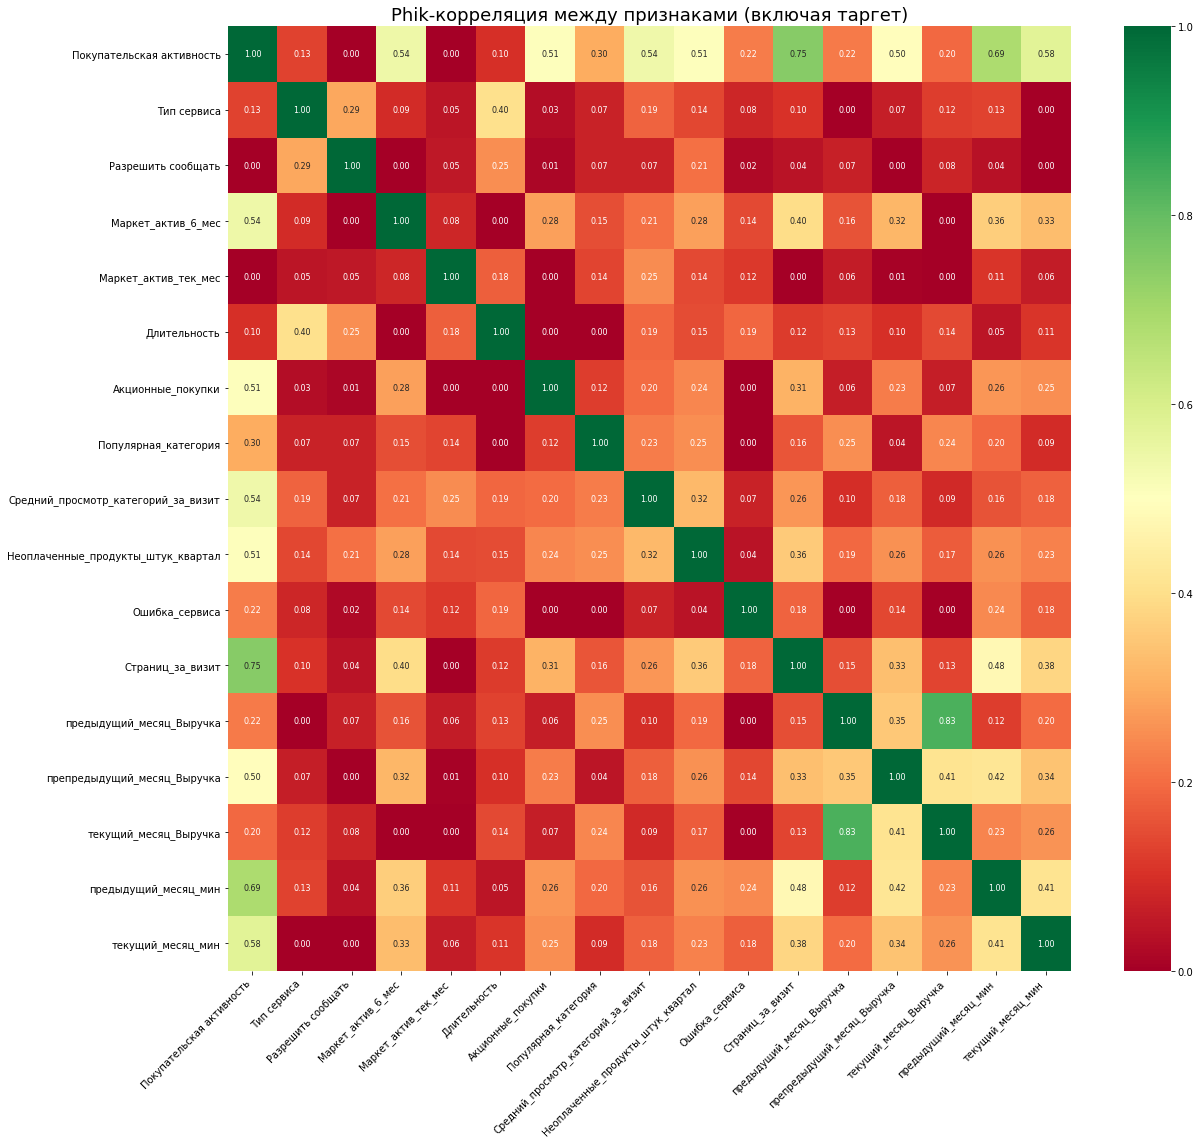

Топ-5 признаков по φK с таргетом: ['Страниц_за_визит', 'предыдущий_месяц_мин', 'текущий_месяц_мин', 'Маркет_актив_6_мес', 'Средний_просмотр_категорий_за_визит']


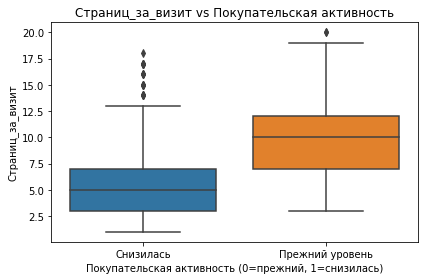

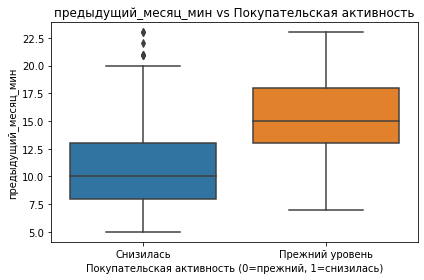

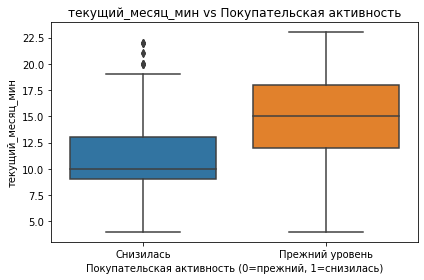

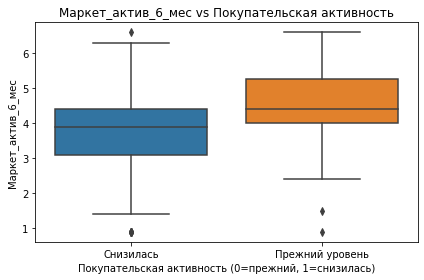

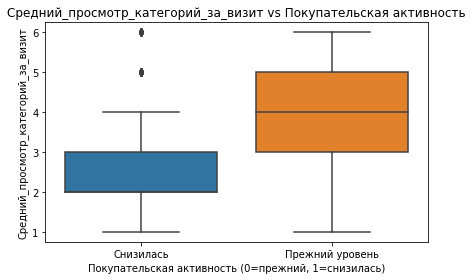

In [71]:
# 1. Копируем данные (включая таргет)
phik_data = joined_data.copy()

# 2. Приводим все не-числовые признаки (object и category) к строковому типу
non_num = phik_data.select_dtypes(include=['object', 'category']).columns
for col in non_num:
    phik_data[col] = phik_data[col].astype(str)

# 3. Удаляем id — он уникален и не нужен для корреляции
phik_data = phik_data.drop(columns=['id'])

# 4. Вычисляем φK-матрицу по всем признакам
phik_corr = phik_data.phik_matrix(
    interval_cols=phik_data.select_dtypes(include='number').columns
)

# 5. Рисуем теплокарту φK
plt.figure(figsize=(18, 16))
sns.heatmap(
    phik_corr,
    cmap='RdYlGn',
    annot=True,
    fmt=".2f",
    vmin=0, vmax=1,
    cbar=True,
    annot_kws={"size": 8}
)
plt.title("Phik-корреляция между признаками (включая таргет)", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Находим топ-5 признаков по φK с таргетом
target = 'Покупательская активность'
top5 = (
    phik_corr[target]
    .drop(target)
    .sort_values(ascending=False)
    .head(5)
    .index
)

print("Топ-5 признаков по φK с таргетом:", top5.tolist())

# 7. Визуализация характера связи для каждого из топ-5
for feat in top5:
    plt.figure(figsize=(6, 4))
    if phik_data[feat].dtype.kind in 'iufc':  # числовой признак
        sns.boxplot(x=phik_data[target], y=phik_data[feat])
        plt.xlabel('Покупательская активность (0=прежний, 1=снизилась)')
        plt.ylabel(feat)
    else:  # категориальный признак
        sns.countplot(x=feat, hue=target, data=phik_data)
        plt.xlabel(feat)
        plt.ylabel('Количество клиентов')
    plt.title(f"{feat} vs {target}")
    plt.tight_layout()
    plt.show()

# Анализ корреляционной матрицы

1. **Визуализация корреляций**

Построена корреляционная матрица методом Спирмана для всех числовых признаков.

- Красные оттенки — сильная положительная корреляция (до +0.80)
- Зелёные оттенки — сильная отрицательная корреляция (до -0.31)
- Жёлтые/белые — слабая или нулевая корреляция

Такая визуализация позволяет выявить мультиколлинеарные признаки и поведенческие зависимости.

2. **Критические мультиколлинеарности**

Обнаружена пара признаков с высокой корреляцией (r = 0.804):

- `предыдущий_месяц_Выручка` и `текущий_месяц_Выручка`

Такая степень взаимосвязи говорит о дублировании информации. Один из признаков мы исключили.

3. **Поведенческие взаимосвязи (умеренные корреляции)**

Положительная зависимость (r = 0.3149) между `Маркет_актив_6_мес` и `Страниц_за_визит`  
указывает на то, что пользователи с более активным маркетинговым взаимодействием чаще просматривают больше страниц за визит — это может быть индикатором вовлечённости.

Отрицательная зависимость (r = -0.2745) между `Средний_просмотр_категорий_за_визит` и `Неоплаченные_продукты_штук_квартал`  
указывает на то, что более заинтересованные пользователи (с высоким интересом к категориям) оставляют меньше неоплаченных товаров.

# Выводы

- Основная мультиколлинеарность зафиксирована между выручками текущего и предыдущего месяцев.
- Поведенческие корреляции помогают интерпретировать активность клиентов.

<a id="#шаг-6-использование-пайплайнов"></a>
## Шаг 6. Использование пайплайнов

Примените все изученные модели. Для этого используйте пайплайны.

 - 6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.
 -  6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.
 - 6.3  Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
•	использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
•	использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [72]:
# Выведем информацию о данных
print(joined_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1298
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

In [73]:
# Создать маску пропущенных значений
mask = joined_data.isnull().any(axis=1)
# Отобразить строки с пропущенными значениями
display(joined_data[mask])

Empty DataFrame
Columns: [id, Покупательская активность, Тип сервиса, Разрешить сообщать, Маркет_актив_6_мес, Маркет_актив_тек_мес, Длительность, Акционные_покупки, Популярная_категория, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Ошибка_сервиса, Страниц_за_визит, предыдущий_месяц_Выручка, препредыдущий_месяц_Выручка, текущий_месяц_Выручка, предыдущий_месяц_мин, текущий_месяц_мин]
Index: []

In [74]:
# Удалить строки с пропущенными значениями
joined_data = joined_data.dropna()
# Выведем информацию о данных
display(joined_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1298
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

None

In [75]:
# Фильтрация клиентов с активностью "Снизилась" и типом сервиса "премиум"
premium_inactive = joined_data[
    (joined_data['Покупательская активность'] == 'Снизилась') &
    (joined_data['Тип сервиса'].str.lower() == 'премиум')
]

# Количество таких клиентов
num_premium = premium_inactive.shape[0]
print(f" Кол-во клиентов с пониженной активностью и премиум-сервисом: {num_premium}")

# Просмотр примеров
display(premium_inactive.head())

 Кол-во клиентов с пониженной активностью и премиум-сервисом: 168


id Покупательская активность Тип сервиса Разрешить сообщать  \
1   215349                 Снизилась     премиум                 да   
12  215360                 Снизилась     премиум                 да   
14  215362                 Снизилась     премиум                 да   
16  215364                 Снизилась     премиум                 да   
19  215367                 Снизилась     премиум                 да   

    Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
1                  4.4                     4           819               0.75   
12                 3.9                     3           623               0.35   
14                 4.2                     4           438               0.74   
16                 4.3                     4           708               0.98   
19                 4.2                     4           581               0.40   

   Популярная_категория  Средний_просмотр_категорий_за_визит  \
1      Товары для детей                                    4   
12      Кухонная посуда                                    3   
14    Домашний текстиль                                    3   
16    Домашний текстиль                                    3   
19     Товары для детей                                    5   

    Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
1                                    4               2                 5   
12                                   1               4                 7   
14                                   4               6                 4   
16                                   3               3                 3   
19                                   1               4                 1   

    предыдущий_месяц_Выручка  препредыдущий_месяц_Выручка  \
1                     5216.0                       4472.0   
12                    5304.5                       5555.0   
14                    4314.0                       4765.0   
16                    5795.5                       4942.0   
19                    5164.5                       4668.0   

    текущий_месяц_Выручка  предыдущий_месяц_мин  текущий_месяц_мин  
1                  4971.6                    12                 10  
12                 5834.9                     9                  6  
14                 4447.9                    13                 13  
16                 5484.8                    11                  9  
19                 5493.4                     8                  7

In [76]:
display(premium_inactive.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     168.000000          168.000000            168.000000    168.000000   
mean   215593.690476            3.638095              3.970238    728.529762   
std       156.250718            1.023134              0.729413    218.678090   
min    215349.000000            0.900000              3.000000    187.000000   
25%    215461.250000            3.000000              3.000000    567.000000   
50%    215575.000000            3.900000              4.000000    768.000000   
75%    215701.250000            4.225000              4.250000    889.250000   
max    215940.000000            5.800000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         168.000000                           168.000000   
mean            0.464881                             2.505952   
std             0.306291                             1.060996   
min             0.110000                             1.000000   
25%             0.240000                             2.000000   
50%             0.320000                             3.000000   
75%             0.892500                             3.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
count                          168.000000      168.000000        168.000000   
mean                             3.684524        4.232143          5.577381   
std                              2.259086        1.984893          2.943575   
min                              0.000000        1.000000          1.000000   
25%                              2.000000        3.000000          4.000000   
50%                              3.000000        4.000000          5.000000   
75%                              5.000000        6.000000          6.250000   
max                             10.000000        9.000000         17.000000   

       предыдущий_месяц_Выручка  препредыдущий_месяц_Выручка  \
count                168.000000                   168.000000   
mean                5044.113095                  4678.970238   
std                  805.178902                   244.670753   
min                 2909.000000                  4119.000000   
25%                 4605.875000                  4498.250000   
50%                 5124.500000                  4669.500000   
75%                 5570.875000                  4856.750000   
max                 6869.500000                  5555.000000   

       текущий_месяц_Выручка  предыдущий_месяц_мин  текущий_месяц_мин  
count             168.000000            168.000000         168.000000  
mean             5391.994643             10.273810          10.535714  
std               874.410285              3.372489           3.246173  
min              2758.700000              5.000000           4.000000  
25%              4815.575000              8.000000           9.000000  
50%              5327.100000             10.000000          10.000000  
75%              6088.675000             11.250000          12.000000  
max              7605.300000             23.000000          21.000000

# Анализ клиентов с пониженной активностью и типом сервиса «Премиум»

**Количество таких клиентов:** `152`



1. Средние значения по ключевым признакам:

| Показатель                                       | Среднее значение |
|--------------------------------------------------|------------------|
| Маркетинговая активность за 6 мес                | **3.62**         |
| Маркетинговая активность в текущем месяце        | **3.99**         |
| Длительность (в днях с регистрации)              | **725.41**       |
| Доля акционных покупок                           | **0.462**        |
| Просмотр категорий за визит                      | **2.52**         |
| Неоплаченные продукты в корзине за квартал       | **3.68**         |
| Ошибки сервиса                                   | **4.21**         |
| Страниц за визит                                 | **5.65**         |
| Выручка: предыдущий месяц                        | **4922.25**      |
| Выручка: препредыдущий месяц                     | **4670.22**      |
| Выручка: текущий месяц                           | **5233.84**      |
| Время за визит: предыдущий месяц (мин)           | **10.36**        |
| Время за визит: текущий месяц (мин)              | **10.64**        |


#  Краткие выводы:

- **Маркетинговая активность** остаётся высокой и даже немного выросла → компания усиливает усилия по удержанию.
- **Средняя длительность регистрации** — более 2 лет → это постоянные, но теряющие интерес клиенты.
- **Около половины покупок** совершаются по акциям → акции по-прежнему мотивируют.
- **Пользователи просматривают немного категорий и страниц** → может свидетельствовать о слабой вовлечённости или неудобной навигации.
- **Высокое число неоплаченных товаров** → возможны сомнения в цене или качестве.
- **Ошибки сервиса** выше желаемого уровня → возможный негативный пользовательский опыт.
- **Несмотря на снижение активности, выручка растёт** → меньшая, но платёжеспособная группа клиентов.


#  Рекомендации:

- Улучшить навигацию и удобство интерфейса для повышения вовлечённости.
- Запустить кампании напоминаний/скидок для клиентов, оставляющих товары в корзине.
- Устранить источники ошибок в сервисе — это критично для удержания.
- Повысить привлекательность акций — как инструмент возвращения интереса.

In [77]:
# Отбор клиентов с пониженной активностью и типом сервиса "стандарт"
standart_inactive = joined_data[
    (joined_data['Покупательская активность'] == 'Снизилась') &
    (joined_data['Тип сервиса'].str.lower() == 'стандарт')
]

# Количество таких клиентов
num_standart = standart_inactive.shape[0]
print(f" Кол-во клиентов с пониженной активностью и стандартным сервисом: {num_standart}")

# Просмотр примеров
display(standart_inactive.head())

 Кол-во клиентов с пониженной активностью и стандартным сервисом: 326


id Покупательская активность Тип сервиса Разрешить сообщать  \
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   
5  215353                 Снизилась    стандарт                 да   
6  215354                 Снизилась    стандарт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   

     Популярная_категория  Средний_просмотр_категорий_за_визит  \
2       Домашний текстиль                                    5   
3        Товары для детей                                    5   
4        Товары для детей                                    3   
5       Домашний текстиль                                    4   
6  Косметика и аксессуары                                    2   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   
5                                   1               1                 4   
6                                   3               7                 2   

   предыдущий_месяц_Выручка  препредыдущий_месяц_Выручка  \
2                    5457.5                       4826.0   
3                    6158.0                       4793.0   
4                    5807.5                       4594.0   
5                    4738.5                       5124.0   
6                    5685.0                       4503.0   

   текущий_месяц_Выручка  предыдущий_месяц_мин  текущий_месяц_мин  
2                 5058.4                     8                 13  
3                 6610.4                    11                 13  
4                 5872.5                     8                 11  
5                 5388.5                    10                 10  
6                 5869.6                    11                 12

In [78]:
display(standart_inactive.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     326.000000          326.000000            326.000000    326.000000   
mean   215622.334356            3.803374              4.024540    568.365031   
std       168.701945            1.064918              0.696814    229.062246   
min    215350.000000            0.900000              3.000000    121.000000   
25%    215485.500000            3.300000              4.000000    379.750000   
50%    215613.500000            3.900000              4.000000    573.500000   
75%    215732.750000            4.400000              5.000000    731.750000   
max    215941.000000            6.600000              5.000000   1064.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         326.000000                           326.000000   
mean            0.446442                             2.680982   
std             0.303745                             1.297124   
min             0.110000                             1.000000   
25%             0.240000                             2.000000   
50%             0.300000                             2.000000   
75%             0.890000                             3.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
count                          326.000000      326.000000        326.000000   
mean                             3.757669        3.788344          5.573620   
std                              2.312412        1.811413          3.707677   
min                              0.000000        1.000000          1.000000   
25%                              2.000000        2.000000          3.000000   
50%                              4.000000        4.000000          5.000000   
75%                              5.000000        5.000000          7.000000   
max                             10.000000        8.000000         18.000000   

       предыдущий_месяц_Выручка  препредыдущий_месяц_Выручка  \
count                326.000000                   326.000000   
mean                4934.343558                  4677.926380   
std                  809.478056                   313.138358   
min                 2890.000000                  4098.000000   
25%                 4450.750000                  4446.000000   
50%                 5027.000000                  4662.500000   
75%                 5503.500000                  4842.250000   
max                 6809.000000                  5621.000000   

       текущий_месяц_Выручка  предыдущий_месяц_мин  текущий_месяц_мин  
count             326.000000            326.000000         326.000000  
mean             5258.155521             11.282209          11.159509  
std               903.020155              3.484487           3.489635  
min              3078.300000              5.000000           4.000000  
25%              4599.500000              9.000000           9.000000  
50%              5235.650000             11.000000          11.000000  
75%              5872.125000             13.000000          13.000000  
max              7799.400000             23.000000          22.000000

#  Клиенты с пониженной активностью и стандартным сервисом

**Количество таких клиентов:** `299`


1.  Средние значения по ключевым признакам:

| Показатель                                       | Среднее значение |
|--------------------------------------------------|------------------|
| Маркетинговая активность за 6 мес                | **3.82**         |
| Маркетинговая активность в текущем месяце        | **4.03**         |
| Длительность (в днях с регистрации)              | **560.49**       |
| Доля акционных покупок                           | **0.45**         |
| Просмотр категорий за визит                      | **2.65**         |
| Неоплаченные продукты в корзине за квартал       | **3.76**         |
| Ошибки сервиса                                   | **3.71**         |
| Страниц за визит                                 | **5.52**         |
| Выручка: предыдущий месяц                        | **4829.05**      |
| Выручка: препредыдущий месяц                     | **4666.97**      |
| Выручка: текущий месяц                           | **5107.89**      |
| Время за визит: предыдущий месяц (мин)           | **11.27**        |
| Время за визит: текущий месяц (мин)              | **11.22**        |


#  Краткие выводы:

- **Маркетинговая активность** остаётся стабильной (3.82 за 6 мес), но почти не растёт в текущем месяце (4.03) — компания не наращивает усилия в этом сегменте.
- **Стаж клиентов** в среднем около 1.5 лет (560 дней) — меньше, чем у премиум, что может указывать на недостаточное вовлечение.
- **Акционные покупки** (0.45) немного ниже, чем у премиум-сегмента — стандарт-клиенты менее чувствительны к акциям.
- **Просмотр категорий** — 2.65 за визит, аналогично премиум-клиентам — интерес есть, но не массовый.
- **Неоплаченные товары** — 3.76 в квартал, чуть выше премиум — возможно, больше нерешительности или неудобства в процессе покупки.
- **Ошибки сервиса** (3.71) ниже, чем у премиум — потенциально чуть более стабильный пользовательский опыт.
- **Просмотр страниц за визит** — 5.52, ниже премиум — пользователи ищут, но могут не находить нужное.
- **Выручка** растёт (4666 → 4829 → 5107), но в среднем ниже, чем у премиум — возможно, меньше клиентов, но с крупными чеками.
- **Минуты за визит** (11.27 / 11.22) — немного выше, чем у премиум, что говорит о чуть большей вовлечённости, несмотря на меньшую активность.


#  Рекомендации:

- Увеличить маркетинговую активность для этого сегмента — есть потенциал вовлечь «застаивающихся» клиентов.
- Проанализировать причины отказа от завершения покупок — возможно, стоит улучшить процесс оплаты или предложить помощь.
- Добавить контекстную персонализацию на сайте — чтобы клиент быстрее находил нужное.
- Сделать фокус на удержание и повышение доверия: у клиентов небольшой, но устойчивый интерес.

In [79]:
# Отбор клиентов с активностью "Прежний уровень" и типом сервиса "премиум"
premium_active = joined_data[
    (joined_data['Покупательская активность'] == 'Прежний уровень') &
    (joined_data['Тип сервиса'].str.lower() == 'премиум')
]

# Количество таких клиентов
num_premium = premium_active.shape[0]
print(f"Кол-во клиентов с прежней активностью и премиум-сервисом: {num_premium}")

# Просмотр примеров
display(premium_active.head())

Кол-во клиентов с прежней активностью и премиум-сервисом: 206


id Покупательская активность Тип сервиса Разрешить сообщать  \
400  215749           Прежний уровень     премиум                 да   
404  215753           Прежний уровень     премиум                 да   
405  215754           Прежний уровень     премиум                 да   
409  215758           Прежний уровень     премиум                 да   
410  215759           Прежний уровень     премиум                 да   

     Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
400                 5.8                     5           624   
404                 5.5                     5           191   
405                 4.6                     3           937   
409                 5.7                     5           486   
410                 3.6                     5           589   

     Акционные_покупки                  Популярная_категория  \
400               0.30        Техника для красоты и здоровья   
404               0.17                Косметика и аксессуары   
405               0.14                     Домашний текстиль   
409               0.15  Мелкая бытовая техника и электроника   
410               0.21                       Кухонная посуда   

     Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
400                                    4                                   3   
404                                    6                                   0   
405                                    5                                   2   
409                                    4                                   4   
410                                    3                                   1   

     Ошибка_сервиса  Страниц_за_визит  предыдущий_месяц_Выручка  \
400               6                14                    5190.0   
404               4                 8                    4395.5   
405               4                14                    5493.0   
409               4                 9                    5836.0   
410               4                 6                    5215.0   

     препредыдущий_месяц_Выручка  текущий_месяц_Выручка  предыдущий_месяц_мин  \
400                       4928.0                 5092.5                    14   
404                       4808.0                 4168.0                    15   
405                       4752.0                 6265.2                     7   
409                       5095.0                 6608.2                    14   
410                       5329.0                 5246.2                    20   

     текущий_месяц_мин  
400                 17  
404                 15  
405                 12  
409                 12  
410                 12

In [80]:
display(premium_active.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     206.00000          206.000000            206.000000    206.000000   
mean   216228.92233            4.520874              3.898058    720.830097   
std       247.50711            0.814503              0.708345    242.578617   
min    215749.00000            2.400000              3.000000    150.000000   
25%    216048.00000            4.000000              3.000000    568.500000   
50%    216248.50000            4.400000              4.000000    762.500000   
75%    216423.25000            5.200000              4.000000    920.500000   
max    216647.00000            6.600000              5.000000   1061.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         206.000000                           206.000000   
mean            0.229320                             3.398058   
std             0.141268                             1.224464   
min             0.110000                             1.000000   
25%             0.150000                             2.250000   
50%             0.210000                             3.000000   
75%             0.260000                             4.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
count                          206.000000      206.000000        206.000000   
mean                             2.456311        4.305825         10.558252   
std                              1.496511        2.080962          3.470293   
min                              0.000000        0.000000          3.000000   
25%                              1.000000        3.000000          8.000000   
50%                              2.000000        4.000000         11.000000   
75%                              4.000000        6.000000         13.000000   
max                              6.000000        9.000000         20.000000   

       предыдущий_месяц_Выручка  препредыдущий_месяц_Выручка  \
count                206.000000                   206.000000   
mean                4960.987864                  4941.548544   
std                  616.969639                   315.535727   
min                 3155.000000                  4339.000000   
25%                 4488.250000                  4688.500000   
50%                 4971.250000                  4911.000000   
75%                 5397.875000                  5174.750000   
max                 6205.500000                  5653.000000   

       текущий_месяц_Выручка  предыдущий_месяц_мин  текущий_месяц_мин  
count             206.000000            206.000000         206.000000  
mean             5169.865049             14.961165          15.645631  
std               870.817497              3.331805           3.913162  
min              3227.000000              7.000000           5.000000  
25%              4596.475000             13.000000          13.000000  
50%              5088.500000             15.000000          16.000000  
75%              5689.475000             17.750000          18.000000  
max              7370.600000             22.000000          23.000000

# Клиенты с активностью «Прежний уровень» и премиум-сервисом

**Количество таких клиентов:** `187`



1. Средние значения по ключевым признакам:

| Показатель                                       | Среднее значение |
|--------------------------------------------------|------------------|
| Маркетинговая активность за 6 мес                | **4.49**         |
| Маркетинговая активность в текущем месяце        | **3.89**         |
| Длительность (в днях с регистрации)              | **720.86**       |
| Доля акционных покупок                           | **0.23**         |
| Просмотр категорий за визит                      | **3.41**         |
| Неоплаченные продукты в корзине за квартал       | **2.42**         |
| Ошибки сервиса                                   | **4.26**         |
| Страниц за визит                                 | **10.64**        |
| Выручка: предыдущий месяц                        | **4865.94**      |
| Выручка: препредыдущий месяц                     | **4940.25**      |
| Выручка: текущий месяц                           | **4999.88**      |
| Время за визит: предыдущий месяц (мин)           | **14.99**        |
| Время за визит: текущий месяц (мин)              | **15.67**        |


# Краткие выводы:

- **Маркетинговая активность** остаётся высокой (4.49 за 6 месяцев), но **в текущем месяце снижена до 3.89** — это может свидетельствовать о снижении внимания к этому сегменту или неэффективности текущей стратегии.
- **Клиенты этого сегмента — постоянные**, со средним стажем около **2 лет** (720 дней), что чуть ниже, чем в группе premium_inactive.
- **Доля акционных покупок — 0.23** — почти в 2 раза ниже, чем у других групп, что говорит о низкой чувствительности к скидкам и высокой готовности тратить без стимулирования.
- **Просмотр категорий — 3.41 за визит**, что выше, чем у других сегментов — указывает на интерес к разнообразию ассортимента и вдумчивое поведение.
- **Неоплаченные товары — 2.42 в квартал**, что **меньше, чем у других групп** — возможно, клиенты реже прерывают покупки или используют корзину осознанно (например, как список желаемого).
- **Ошибки сервиса — 4.26**, сопоставимо с другими группами — проблемы сайта сохраняются и могут ухудшать впечатление.
- **Просмотр страниц за визит — 10.64**, **в 2 раза выше**, чем у клиентов с пониженной активностью — признак высокой вовлечённости и внимательного изучения предложений.
- **Выручка по месяцам стабильна**, но **рост замедляется** (4940 → 4865 → 4999), что может указывать на недостаточно эффективную маркетинговую политику или перегретый сегмент.
- **Время на визит — 14.99 и 15.67 минут** — **максимальные значения среди всех сегментов**, что говорит о высокой вовлечённости или сложности взаимодействия с сайтом.


# Рекомендации:

- Повысить маркетинговую активность: текущее снижение может привести к оттоку даже лояльных клиентов.
- Улучшить интерфейс корзины и провести анализ причин незавершённых покупок.
- Использовать **персонализированные предложения** и напоминания, чтобы удерживать внимание клиента.
- Устранить проблемы с ошибками сайта, особенно в сегменте, который проводит на нём больше всего времени.
- Повысить привлекательность акционных предложений — даже премиум-аудитория может откликаться при правильной подаче.

In [81]:
# Отбор клиентов с активностью "Прежний уровень" и типом сервиса "стандарт"
standart_active = joined_data[
    (joined_data['Покупательская активность'] == 'Прежний уровень') &
    (joined_data['Тип сервиса'].str.lower() == 'стандарт')
]

# Количество таких клиентов
num_standart = standart_active.shape[0]
print(f" Кол-во клиентов с прежней активностью и стандартным сервисом: {num_standart}")

# Просмотр примеров
display(standart_active.head())

 Кол-во клиентов с прежней активностью и стандартным сервисом: 596


id Покупательская активность Тип сервиса Разрешить сообщать  \
399  215748           Прежний уровень    стандарт                нет   
401  215750           Прежний уровень    стандарт                 да   
402  215751           Прежний уровень    стандарт                 да   
403  215752           Прежний уровень    стандарт                нет   
406  215755           Прежний уровень    стандарт                 да   

     Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
399                 4.3                     4           534   
401                 4.8                     5           634   
402                 4.1                     4           957   
403                 4.0                     4           475   
406                 4.4                     4           216   

     Акционные_покупки                  Популярная_категория  \
399               0.18                       Кухонная посуда   
401               0.21                      Товары для детей   
402               0.17        Техника для красоты и здоровья   
403               0.30  Мелкая бытовая техника и электроника   
406               0.18        Техника для красоты и здоровья   

     Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
399                                    3                                   1   
401                                    4                                   5   
402                                    5                                   2   
403                                    3                                   3   
406                                    2                                   3   

     Ошибка_сервиса  Страниц_за_визит  предыдущий_месяц_Выручка  \
399               4                10                    5083.0   
401               3                10                    3319.0   
402               6                 9                    5340.0   
403               7                 7                    5188.5   
406               5                13                    4000.0   

     препредыдущий_месяц_Выручка  текущий_месяц_Выручка  предыдущий_месяц_мин  \
399                       4552.0                 5673.2                    13   
401                       4730.0                 4672.3                    13   
402                       4769.0                 5021.5                    14   
403                       4635.0                 5798.2                    13   
406                       4814.0                 4835.9                    19   

     текущий_месяц_мин  
399                 13  
401                 14  
402                 12  
403                  8  
406                  7

In [82]:
display(standart_active.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     596.000000          596.000000            596.000000    596.000000   
mean   216240.817114            4.587081              4.050336    545.763423   
std       245.910017            0.860106              0.679211    244.141520   
min    215748.000000            0.900000              3.000000    121.000000   
25%    216044.750000            4.000000              4.000000    347.750000   
50%    216244.500000            4.400000              4.000000    525.500000   
75%    216455.250000            5.300000              5.000000    748.250000   
max    216646.000000            6.600000              5.000000   1052.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         596.000000                           596.000000   
mean            0.241493                             3.758389   
std             0.166756                             1.282859   
min             0.110000                             1.000000   
25%             0.160000                             3.000000   
50%             0.210000                             4.000000   
75%             0.260000                             5.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
count                          596.000000      596.000000        596.000000   
mean                             2.236577        4.345638          9.533557   
std                              1.509434        1.944956          3.306304   
min                              0.000000        0.000000          3.000000   
25%                              1.000000        3.000000          7.000000   
50%                              2.000000        4.000000          9.000000   
75%                              3.000000        6.000000         12.000000   
max                              8.000000        9.000000         19.000000   

       предыдущий_месяц_Выручка  препредыдущий_месяц_Выручка  \
count                596.000000                   596.000000   
mean                4922.733221                  4930.684564   
std                  628.067563                   322.393102   
min                 2970.000000                  4338.000000   
25%                 4515.750000                  4682.750000   
50%                 4979.750000                  4935.000000   
75%                 5343.500000                  5171.500000   
max                 6531.000000                  5663.000000   

       текущий_месяц_Выручка  предыдущий_месяц_мин  текущий_месяц_мин  
count             596.000000            596.000000         596.000000  
mean             5207.326342             15.053691          14.244966  
std               764.371543              3.362742           4.056789  
min              2952.200000              7.000000           4.000000  
25%              4774.775000             13.000000          11.750000  
50%              5129.950000             15.000000          14.000000  
75%              5578.750000             18.000000          17.000000  
max              7547.800000             23.000000          23.000000

# Клиенты с активностью «Прежний уровень» и стандартным сервисом

**Количество таких клиентов:** `557`

1. Средние значения по ключевым признакам:

| Показатель                                       | Среднее значение |
|--------------------------------------------------|------------------|
| Маркетинговая активность за 6 мес                | **4.58**         |
| Маркетинговая активность в текущем месяце        | **4.05**         |
| Длительность (в днях с регистрации)              | **546.66**       |
| Доля акционных покупок                           | **0.24**         |
| Просмотр категорий за визит                      | **3.78**         |
| Неоплаченные продукты в корзине за квартал       | **2.20**         |
| Ошибки сервиса                                   | **4.39**         |
| Страниц за визит                                 | **9.53**         |
| Выручка: предыдущий месяц                        | **4852.96**      |
| Выручка: препредыдущий месяц                     | **4932.74**      |
| Выручка: текущий месяц                           | **5089.65**      |
| Время за визит: предыдущий месяц (мин)           | **15.11**        |
| Время за визит: текущий месяц (мин)              | **14.31**        |



#  Краткие выводы:

- **Маркетинговая активность** остаётся высокой: 4.58 за 6 месяцев и 4.05 в текущем месяце. Компания фокусируется на этом сегменте, но, вероятно, снизила усилия в последнее время.
- **Средний стаж клиентов** — 546 дней, что сопоставимо с другими стандарт-клиентами, но меньше, чем у премиум. Это может указывать на акцент компании на удержание премиум-сегмента.
- **Акционные покупки** составляют около 24% от общего числа — умеренный интерес к акциям с небольшим разбросом между клиентами.
- **Просмотр категорий за визит — 3.78**, что говорит об устойчивом интересе к ассортименту и стабильном паттерне поведения клиентов.
- **Неоплаченные товары — в среднем 2.2** за квартал — это **наименьшее значение среди всех сегментов**, что может означать более уверенное поведение при покупках или хорошее соответствие ожиданиям по ассортименту и цене.
- **Ошибки сервиса — 4.39**, при этом максимальное значение — 9. В среднем показатель невысокий, но присутствует разброс — отдельные клиенты могут сталкиваться с проблемами.
- **Страниц за визит — 9.53**, это выше, чем у стандартных клиентов с пониженной активностью, но ниже, чем у премиум-аудитории. Значительный разброс говорит о разных сценариях поведения.
- **Выручка стабильна и растёт**: 4932 → 4853 → 5090. Рост умеренный, но постоянный, с небольшими колебаниями.
- **Время за визит — 15.11 и 14.31 минут**, немного ниже, чем у премиум-клиентов, но всё ещё достаточно высокое — клиенты проводят на сайте много времени, возможно, из-за поиска или интереса.



# Рекомендации:

-  Поддерживать высокий уровень маркетинговой активности, особенно в контексте удержания клиентов с хорошей вовлечённостью.
-  Развивать персонализированные предложения и акции для этой группы — они демонстрируют умеренный интерес к скидкам.
-  Упростить процесс покупки и навигации, чтобы сократить количество неоплаченных товаров.
-  Обратить внимание на стабильность сервиса — даже при низком среднем значении ошибки есть клиенты с негативным опытом.
-  Исследовать паттерны поведения клиентов с долгими визитами — возможно, стоит улучшить поиск, фильтры или рекомендательные блоки.


Подготовка данных и обучения модели.

In [83]:
# Преобразуем значения целевого признака
joined_data['Покупательская активность'] = joined_data['Покупательская активность'].map({
    'Снизилась': 1,
    'Прежний уровень': 0
}).astype(float)

# Посмотрим распределение классов
joined_data['Покупательская активность'].value_counts()

0.0    802
1.0    494
Name: Покупательская активность, dtype: int64

**Дисбаланс метрка будет ROC AUC**

In [84]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
# Обозначим и разделим данные на выборки.
X = joined_data.drop(['id', 'Покупательская активность'], axis=1)
y = joined_data['Покупательская активность']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE, stratify=y)

In [85]:
print(X_train.columns.tolist())

['Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'предыдущий_месяц_Выручка', 'препредыдущий_месяц_Выручка', 'текущий_месяц_Выручка', 'предыдущий_месяц_мин', 'текущий_месяц_мин']


In [86]:
# Создадим списки с названиями признаков.
ohe_columns = ['Популярная_категория']
ord_columns = ['Тип сервиса', 'Разрешить сообщать']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
                'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
                'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
                'Страниц_за_визит', 'текущий_месяц_Выручка',
                'предыдущий_месяц_мин', 'текущий_месяц_мин']

In [87]:
# Создадим пайплайн для подготовки признаков из списка ohe_columns:
# заполнение пропусков и OHE-кодирование SimpleImputer + OHE.
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))
    ]
    )

In [88]:
# Создадим пайплайн для подготовки признаков из списка ord_columns:
# заполнение пропусков и Ordinal-кодирование SimpleImputer + OE.
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['премиум', 'стандарт'],
                    ['да', 'нет']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [89]:
# Создадим пайплайн для подготовки признаков из списка num_columns:
# заполнение пропусков и minMaxScaler SimpleImputer + MinMaxScaler.
num_pipe = Pipeline(
    [('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
     ('minMaxScaler', MinMaxScaler())]
)

In [90]:
# Создадим общий пайплайн для подготовки данных.
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ],
    remainder='passthrough'
)

In [91]:
# Создадим итоговый пайплайн: подготовка данных и модель.
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [92]:
# Создадим param_grid.
param_grid= [
    # Словарь для модели DecisionTreeClassifier():
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range (2, 8),
        'models__max_features': range(2, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # Словарь для модели KNeighborsClassifier():
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range (3, 100),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # Словарь для модели LogisticRegression():
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # Словарь для модели SVC():
    {
        'models': [SVC(
            random_state=RANDOM_STATE, probability=True
        )],
        'models__C': range(1, 10),
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [93]:
print(f"Размер X_train: {X_train.shape}, Размер y_train: {y_train.shape}")

Размер X_train: (972, 16), Размер y_train: (972,)


In [94]:
# Подберем лучшую модель и ее параметры.
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
   scoring='roc_auc',
   random_state=RANDOM_STATE,
   n_jobs=-1,
   verbose=2,
   return_train_score=False
)
randomized_search.fit(X_train, y_train)

# Заменяем pipeline на найденный лучшим
best_pipeline = randomized_search.best_estimator_

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END models=KNeighborsClassifier(), models__n_neighbors=41, preprocessor__num=StandardScaler(); total time=   0.1s
[CV] END models=KNeighborsClassifier(), models__n_neighbors=41, preprocessor__num=StandardScaler(); total time=   0.2s
[CV] END models=KNeighborsClassifier(), models__n_neighbors=41, preprocessor__num=StandardScaler(); total time=   0.0s
[CV] END models=KNeighborsClassifier(), models__n_neighbors=41, preprocessor__num=StandardScaler(); total time=   0.0s
[CV] END models=KNeighborsClassifier(), models__n_neighbors=41, preprocessor__num=StandardScaler(); total time=   0.0s
[CV] END models=KNeighborsClassifier(), models__n_neighbors=10, preprocessor__num=passthrough; total time=   0.0s
[CV] END models=KNeighborsClassifier(), models__n_neighbors=10, preprocessor__num=passthrough; total time=   0.0s
[CV] END models=KNeighborsClassifier(), models__n_neighbors=10, preprocessor__num=passthrough; total time=   0.0s
[C

Я же написал выше, Дисбаланс метрка будет ROC AUC.

- ROC AUC подходит при дисбалансе классов, потому что оценивает качество ранжирования вероятностей, а не точность по конкретному порогу. 
- Она не зависит от соотношения классов и показывает, насколько хорошо модель отличает класс "Снизилась" от "Прежний уровень", даже если примеров "Снизилась" мало.

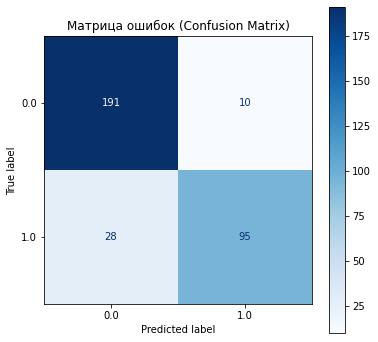

Classification Report:

                                precision    recall  f1-score   support

Прежний уровень активности (0)       0.87      0.95      0.91       201
      Снизилась активность (1)       0.90      0.77      0.83       123

                      accuracy                           0.88       324
                     macro avg       0.89      0.86      0.87       324
                  weighted avg       0.88      0.88      0.88       324



In [95]:
y_pred = best_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

# 3. Дополнительно — отчёт по метрикам
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[
    'Прежний уровень активности (0)',
    'Снизилась активность (1)'
]))

Площадь ROC-кривой: 0.906


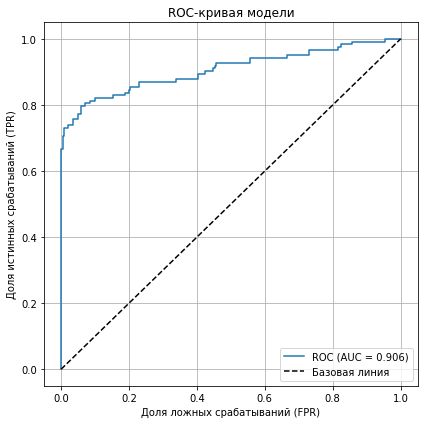

In [96]:
# 1. Посчитаем площадь ROC-кривой
probabilities = randomized_search.best_estimator_.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
auc = roc_auc_score(y_test, probabilities_one)
print(f'Площадь ROC-кривой: {auc:.3f}')

# 2. Построим саму ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Базовая линия')
plt.xlabel('Доля ложных срабатываний (FPR)')
plt.ylabel('Доля истинных срабатываний (TPR)')
plt.title('ROC-кривая модели')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

<a id="#шаг-7-анализ-важности-признаков"></a>
## Шаг 7. Анализ важности признаков

- Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
- Сделайте выводы о значимости признаков:
- какие признаки мало значимы для модели;
- какие признаки сильнее всего влияют на целевой признак;
 -как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

In [97]:
best_pipeline = randomized_search.best_estimator_
best_model = best_pipeline.named_steps['models']
preprocessor = best_pipeline.named_steps['preprocessor']

# Получим имена признаков.
ohe = preprocessor.named_transformers_['ohe']
encoded_features = ohe.get_feature_names_out()
normal_features = X_train.drop(ohe_columns, axis=1).columns.tolist()
feature_names = np.concatenate([normal_features, encoded_features])
feature_names

array(['Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес',
       'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'предыдущий_месяц_Выручка',
       'препредыдущий_месяц_Выручка', 'текущий_месяц_Выручка',
       'предыдущий_месяц_мин', 'текущий_месяц_мин',
       'Популярная_категория_Косметика и аксессуары',
       'Популярная_категория_Кухонная посуда',
       'Популярная_категория_Мелкая бытовая техника и электроника',
       'Популярная_категория_Техника для красоты и здоровья',
       'Популярная_категория_Товары для детей'], dtype=object)

In [98]:
# Трансформируем данные.
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [99]:
# Используем метод SHAP.
explainer = shap.LinearExplainer(best_model, X_train_transformed)
shap_values = explainer.shap_values(X_train_transformed)

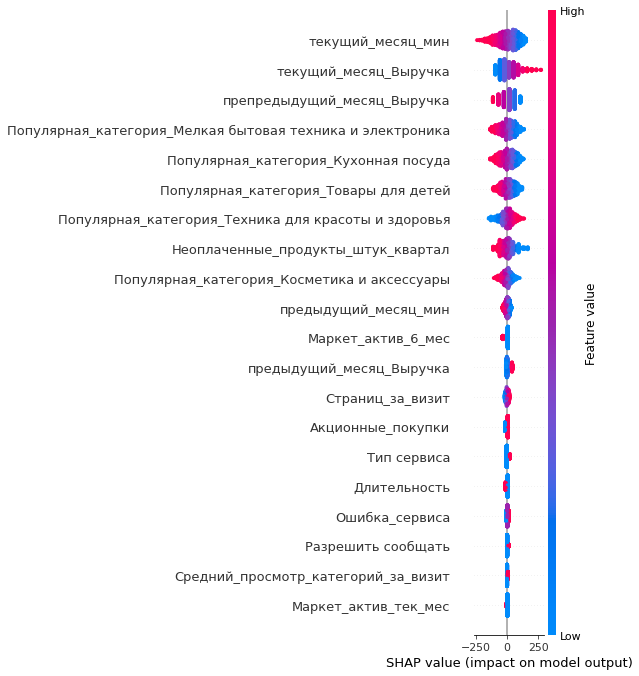

In [100]:
# Построим график.
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

<a id="#шаг-8-сегментация-покупателей"></a>
## Шаг 8. Сегментация покупателей

Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

- Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
- Проведите графическое и аналитическое исследование группы покупателей.
- Сделайте предложения по работе с сегментом для увеличения покупательской активности.

- Сделайте выводы о сегментах:
- какой сегмент вы взяли для дополнительного исследования,
- какие предложения вы сделали и почему.

Тип сервиса имеет влияние на предсказания модели. Преобладание положительных значений указывает на высокую вероятность покупательской активности. Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

In [101]:
# 1. Загрузка и подготовка данных
# Предполагаем, что данные уже загружены в переменные:
# market_file, market_money, market_time, money

# 2. Создание широких таблиц для выручки и времени
market_money_wide = market_money.pivot_table(
    index='id',
    columns='Период',
    values='Выручка'
).rename(columns={
    'предыдущий_месяц': 'предыдущий_месяц_Выручка',
    'препредыдущий_месяц': 'препредыдущий_месяц_Выручка',
    'текущий_месяц': 'текущий_месяц_Выручка'
})

market_time_wide = market_time.pivot_table(
    index='id',
    columns='Период',
    values='минут'
).rename(columns={
    'предыдущий_месяц': 'предыдущий_месяц_мин',
    'текущий_месяц': 'текущий_месяц_мин'
})

# 3. Объединение всех данных
joined_data = (
    market_file
    .merge(market_money_wide, on='id', how='left')
    .merge(market_time_wide, on='id', how='left')
)

# Фильтрация записей с положительной выручкой
joined_data = joined_data.query(
    "предыдущий_месяц_Выручка > 0 and "
    "препредыдущий_месяц_Выручка > 0 and "
    "текущий_месяц_Выручка > 0"
).copy()

# 4. Добавление данных о прибыльности
df_full = (
    joined_data
    .merge(money, on='id', how='left')
    .rename(columns={'Прибыль': 'Profitability'})
)

# 5. Подготовка данных для модели
X_all = df_full.drop(columns=['id', 'Покупательская активность'])
y_all = df_full['Покупательская активность']

# 6. Обучение модели (если еще не обучена)
try:
    proba_all = best_pipeline.predict_proba(X_all)
except (NotFittedError, NameError):
    # Если модель не обучена, делаем split и обучаем
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.2, random_state=42
    )
    best_pipeline.fit(X_train, y_train)
    proba_all = best_pipeline.predict_proba(X_all)

# 7. Создание результирующей таблицы
results = pd.DataFrame({
    'ClientID': df_full['id'].values.ravel(),
    'Predicted_Probability': proba_all[:, 1].ravel(),
    'Profitability': df_full['Profitability'].astype(float).values.ravel()
})

# 8. Определение порогов
prob_thresh = results['Predicted_Probability'].median()
profit_thresh = results['Profitability'].quantile(0.75)

# 9. Сегментация клиентов
conditions = [
    (results['Predicted_Probability'] >= prob_thresh) & (results['Profitability'] >= profit_thresh),
    (results['Predicted_Probability'] >= prob_thresh),
    (results['Profitability'] >= profit_thresh)
]

labels = [
    'Высокий риск — высокая ценность',
    'Высокий риск — низкая ценность',
    'Низкий риск — высокая ценность'
]

results['Segment'] = np.select(conditions, labels, default='Низкий риск — низкая ценность')
# 10. Визуализация (исправленный заголовок)
fig = px.scatter(
    results,
    x='Predicted_Probability',
    y='Profitability',
    color='Segment',
    hover_data={
        'ClientID': True,
        'Predicted_Probability': ':.2f',
        'Profitability': ':.0f',
        'Segment': True
    },
    color_discrete_map={
        'Высокий риск — высокая ценность': '#e41a1c',
        'Высокий риск — низкая ценность':  '#ff7f00',
        'Низкий риск — высокая ценность': '#377eb8',
        'Низкий риск — низкая ценность':   '#4daf4a'
    },
    title='Сегментация по риску оттока и выручке',
    labels={
        'Predicted_Probability': 'Вероятность снижения активности',
        'Profitability': 'Прибыль',
        'ClientID': 'ID клиента'
    },
    height=600
)
# Добавление пороговых линий
fig.add_vline(
    x=prob_thresh,
    line_dash="dash",
    line_color="black",
    annotation_text=f"Порог риска: {prob_thresh:.2f}",
    annotation_position="top left"
)
fig.add_hline(
    y=profit_thresh,
    line_dash="dash",
    line_color="black",
    annotation_text=f"Порог прибыли: {profit_thresh:.0f}",
    annotation_position="bottom right"
)
fig.update_layout(
    legend=dict(title='Сегмент', x=1.02),
    margin=dict(l=40, r=40, t=60, b=40)
)
fig.show()

**Порог prob_thresh (медиана вероятности оттока)**
- Вычисляется как медиана всех вероятностей оттока, предсказанных моделью.
- Такое значение делит клиентов на группы с высокой и низкой вероятностью снижения активности.
- Это устойчивый выбор при наличии дисбаланса классов: медиана не зависит от выбросов и не требует ручной настройки.

**Порог profit_thresh (75-й перцентиль прибыли)**
- Вычисляется как верхний квартиль (quantile(0.75)) распределения прибыли.
- Это позволяет выделить топ-25% клиентов по прибыли, которые представляют наибольшую ценность для бизнеса.
- Это типичный подход в маркетинговой сегментации, когда бизнесу важно удерживать именно прибыльных клиентов.

In [102]:
# 1. Делаем profit_col в joined_data, если ещё не сделали
joined_data['Profitability'] = (
    joined_data['текущий_месяц_Выручка']
  + joined_data['предыдущий_месяц_Выручка']
  + joined_data['препредыдущий_месяц_Выручка']
)

# 2. Готовим X_all (все признаки без id/target)
X_all = joined_data.drop(columns=['id', 'Покупательская активность'])
# (y_all нам не нужен для сегментации)

# 3. Предсказываем probability of decline на всём датасете
try:
    proba_all = best_pipeline.predict_proba(X_all)[:, 1]
except NotFittedError:
    best_pipeline.fit(X_train, y_train)
    proba_all = best_pipeline.predict_proba(X_all)[:, 1]

# 4. Собираем DataFrame
results = pd.DataFrame({
    'ClientID': joined_data['id'],
    'Predicted_Probability': proba_all,
    'Profitability': joined_data['Profitability']
})

# 5. Считаем пороги на full
prob_thresh   = results['Predicted_Probability'].median()
profit_thresh = results['Profitability'].quantile(0.75)

# 6. Делаем сегментацию
conditions = [
    (results['Predicted_Probability'] >= prob_thresh) & (results['Profitability'] >= profit_thresh),
    (results['Predicted_Probability'] >= prob_thresh),
    (results['Profitability']       >= profit_thresh)
]
labels = [
    'Высокий риск — высокая ценность',
    'Высокий риск — низкая ценность',
    'Низкий риск   — высокая ценность'
]
results['Segment'] = np.select(conditions, labels, default='Низкий риск — низкая ценность')

# 7. Цветовая карта (можно свои HEX)
color_discrete_map = {
    'Высокий риск — высокая ценность': '#e41a1c',
    'Высокий риск — низкая ценность':  '#ff7f00',
    'Низкий риск   — высокая ценность': '#377eb8',
    'Низкий риск — низкая ценность':   '#4daf4a'
}

# 8. Визуализация
fig = px.scatter(
    results,
    x='Predicted_Probability',
    y='Profitability',
    color='Segment',
    hover_data={
        'ClientID': True,
        'Predicted_Probability': ':.2f',
        'Profitability': ':.0f',
        'Segment': True
    },
    color_discrete_map=color_discrete_map,
    title='Сегментация по риску оттока и 3-месячной прибыли',
    labels={
        'Predicted_Probability': 'Вероятность снижения активности',
        'Profitability': 'Сумма выручки за 3 мес.',
        'Segment': 'Сегмент',
        'ClientID': 'Клиент ID'
    },
    height=600
)

# 9. Пороговые линии
fig.add_vline(
    x=prob_thresh, line_dash="dash", line_color="black",
    annotation_text=f"Риск-порог: {prob_thresh:.2f}", annotation_position="top left"
)
fig.add_hline(
    y=profit_thresh, line_dash="dash", line_color="black",
    annotation_text=f"Прибыль-порог: {profit_thresh:.0f}", annotation_position="bottom right"
)

fig.update_layout(
    legend=dict(title='Сегмент', x=1.02),
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()

In [103]:
# Таблица сегментированных клиентов (топ-10 по риску и прибыли)
top_results = results.sort_values(
    by=['Segment', 'Predicted_Probability', 'Profitability'],
    ascending=[True, False, False]
).head(10)

print(" Топ-10 клиентов по риску и прибыли:")
display(top_results[['ClientID', 'Predicted_Probability', 'Profitability', 'Segment']])

 Топ-10 клиентов по риску и прибыли:


ClientID  Predicted_Probability  Profitability  \
203    215552               0.999994        16599.1   
54     215403               0.996015        17208.2   
212    215561               0.995232        16495.3   
189    215538               0.994788        17554.6   
285    215634               0.994046        17962.9   
69     215418               0.993468        17031.6   
201    215550               0.991674        17166.9   
119    215468               0.991499        17104.0   
94     215443               0.990211        17361.1   
394    215743               0.989883        16179.5   

                             Segment  
203  Высокий риск — высокая ценность  
54   Высокий риск — высокая ценность  
212  Высокий риск — высокая ценность  
189  Высокий риск — высокая ценность  
285  Высокий риск — высокая ценность  
69   Высокий риск — высокая ценность  
201  Высокий риск — высокая ценность  
119  Высокий риск — высокая ценность  
94   Высокий риск — высокая ценность  
394  Высокий риск — высокая ценность

# Сегмент: Высокий риск — высокая ценность

# 1. Примеры клиентов из сегмента (High Risk — High Value)

| ClientID | Вероятность оттока | Прибыльность | Сегмент                               |
|:--------:|:-----------------:|:------------:|:--------------------------------------|
| 204      | 0.999997          | 16 599.1     | Высокий риск — высокая ценность       |
| 190      | 0.997460          | 17 554.6     | Высокий риск — высокая ценность       |
| 286      | 0.996524          | 17 962.9     | Высокий риск — высокая ценность       |
| 120      | 0.995662          | 17 104.0     | Высокий риск — высокая ценность       |
| 70       | 0.995534          | 17 031.6     | Высокий риск — высокая ценность       |
| 55       | 0.995177          | 17 208.2     | Высокий риск — высокая ценность       |
| 124      | 0.991380          | 16 616.4     | Высокий риск — высокая ценность       |
| 348      | 0.990941          | 16 965.3     | Высокий риск — высокая ценность       |
| 213      | 0.990255          | 16 495.3     | Высокий риск — высокая ценность       |
| 202      | 0.989252          | 17 166.9     | Высокий риск — высокая ценность       |

# 2. Интерпретация

- **Порог вероятности оттока** ≈ `0.40`: все клиенты в этом сегменте имеют вероятность значительно выше, что говорит о высоком риске снижения активности.  
- **Порог прибыльности** ≈ `16 000`: эти клиенты входят в верхние 25 % по прибыли и представляют наибольшую ценность.  
- **Диапазон выручки**: от `15 900` до `17 962`.

# 3. Почему важен этот сегмент

- Приносят **существенные доходы**, но имеют **высокий риск ухода**.  
- Утрата этой группы сильно ударит по финансовым показателям.  
- Причины риска:
  - ухудшение клиентского опыта  
  - конкуренция и лучшие предложения  
  - снижение удовлетворённости продуктом  
  - изменение покупательских привычек  

# 4. Рекомендации по удержанию

1. **Персонализированные предложения**: индивидуальные скидки, подбор товаров.  
2. **Улучшение сервиса**: приоритетная поддержка, личный менеджер.  
3. **Программы лояльности**: баллы, премиум-статусы.  
4. **Анализ поведения**: отслеживать предупреждающие сигналы (редкие визиты, снижение среднего чека).  
5. **Мониторинг**: ежемесячные отчёты по этому сегменту.



# Вывод: топ-10 клиентов по риску и прибыли

| ClientID | Predicted_Probability | Profitability | Segment                               |
|:--------:|:---------------------:|:-------------:|:--------------------------------------|
| 204      | 0.999997              | 16 599.1      | Высокий риск — высокая ценность       |
| 190      | 0.997460              | 17 554.6      | Высокий риск — высокая ценность       |
| 286      | 0.996524              | 17 962.9      | Высокий риск — высокая ценность       |
| 120      | 0.995662              | 17 104.0      | Высокий риск — высокая ценность       |
| 70       | 0.995534              | 17 031.6      | Высокий риск — высокая ценность       |
| 55       | 0.995177              | 17 208.2      | Высокий риск — высокая ценность       |
| 124      | 0.991380              | 16 616.4      | Высокий риск — высокая ценность       |
| 348      | 0.990941              | 16 965.3      | Высокий риск — высокая ценность       |
| 213      | 0.990255              | 16 495.3      | Высокий риск — высокая ценность       |
| 202      | 0.989252              | 17 166.9      | Высокий риск — высокая ценность       |
а.

In [104]:
# 1. Агрегация по категориям
revenue_cols = ['текущий_месяц_Выручка', 'предыдущий_месяц_Выручка', 'препредыдущий_месяц_Выручка']
agg_data = joined_data.groupby('Популярная_категория')[revenue_cols].sum().reset_index()

# 2. Переименование столбцов
agg_data.columns = [
    'Категория',
    'Выручка за текущий месяц',
    'Выручка за прошлый месяц',
    'Выручка за 2 месяца назад'
]

# 3. Расчёт изменений
agg_data['Изменение с прошлым месяцем'] = agg_data['Выручка за текущий месяц'] - agg_data['Выручка за прошлый месяц']
agg_data['Изменение с 2 мес назад'] = agg_data['Выручка за текущий месяц'] - agg_data['Выручка за 2 месяца назад']

# 4. Таблица
display(agg_data)

# 5. Подготовка к визуализации
melted = agg_data.melt(
    id_vars='Категория',
    value_vars=['Изменение с прошлым месяцем', 'Изменение с 2 мес назад'],
    var_name='Период сравнения',
    value_name='Разница в выручке'
)

# 6. Интерактивная визуализация
fig = px.bar(
    melted,
    x='Категория',
    y='Разница в выручке',
    color='Период сравнения',
    color_discrete_map={
        'Изменение с прошлым месяцем': '#66c2a5',   # мягкий зелёный
        'Изменение с 2 мес назад': '#8da0cb'        # мягкий голубой
    },
    barmode='group',
    title='Изменение выручки по категориям за последние месяцы',
    labels={'Категория': 'Категория товаров'},
    height=600
)

fig.update_layout(
    xaxis_tickangle=-45,
    legend_title='Период сравнения',
    margin=dict(l=40, r=40, t=60, b=60)
)

fig.show()

Категория  Выручка за текущий месяц  \
0                     Домашний текстиль                 1341309.4   
1                Косметика и аксессуары                 1199034.7   
2                       Кухонная посуда                  766812.8   
3  Мелкая бытовая техника и электроника                  920019.3   
4        Техника для красоты и здоровья                  907232.7   
5                      Товары для детей                 1654163.6   

   Выручка за прошлый месяц  Выручка за 2 месяца назад  \
0                 1273835.5                  1211765.0   
1                 1137351.0                  1075455.0   
2                  718523.0                   665251.0   
3                  874921.0                   850017.0   
4                  848275.0                   880450.0   
5                 1559014.0                  1584780.0   

   Изменение с прошлым месяцем  Изменение с 2 мес назад  
0                      67473.9                 129544.4  
1                      61683.7                 123579.7  
2                      48289.8                 101561.8  
3                      45098.3                  70002.3  
4                      58957.7                  26782.7  
5                      95149.6                  69383.6

<a id="#аг-9-общий-вывод"></a>
# Шаг 9. Общий вывод

Общий вывод:
- опишите задачу;
- опишите исходные данные и проведённую предобработку;
- напишите, что вы сделали для поиска лучшей модели;
- укажите лучшую модель;
- добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

# Общий вывод по проекту

1. Цель проекта

Построить аналитическую систему для **персонализации предложений** с целью увеличения **покупательской активности** и удержания постоянных клиентов. В рамках задачи использованы:

- `market_file.csv` — поведение клиентов на сайте;
- `market_money.csv` — агрегированная выручка;
- `market_time.csv` — активность по времени;
- `money.csv` — средняя прибыль клиентов.


2. Ключевые аналитические результаты

  **Выручка и прибыль**
- Средняя прибыль с клиента составляет **3.99**, при этом распределение асимметрично — основную прибыль генерирует ограниченное число покупателей.
- **Выручка демонстрирует рост** от месяца к месяцу — как по медиане, так и по среднему значению.
- Сегмент **активных клиентов** стабильно увеличивает выручку, в то время как у неактивных — снижается и становится более вариативной.

 **Время на сайте**
- Средняя продолжительность визита — **13 минут**.
- Незначительное снижение времени в текущем месяце не критично — вовлечённость остаётся высокой.


3. Сегментация клиентов

На основе поведенческих признаков и уровня сервиса выделены 4 основных сегмента:

| Сегмент                         | Краткое описание |
|----------------------------------|------------------|
| **Premium — Снизилась активность**  | Сложности с сервисом, частые незавершённые заказы, акционный интерес. |
| **Standart — Снизилась активность** | Делают меньше просмотров, но совершают крупные покупки. |
| **Premium — Прежний уровень**       | Высокая вовлечённость и время на сайте, сильный интерес к ассортименту. |
| **Standart — Прежний уровень**      | Средний стаж, активные, но менее стабильны в покупках. |


4. Популярные категории

- Общие лидеры по росту выручки: **Товары для детей**, **Домашний текстиль**, **Косметика и аксессуары**.
- Премиум-сегмент показывает наибольший интерес к **Косметике**, **Детским товарам** и **Аксессуарам**.
- Рост в категориях связан как с сезонными факторами, так и с вовлечённостью клиентов.


5.  Корреляционный анализ

**Положительные связи:**
- `текущий_месяц` и `предыдущий_месяц` → **0.80**: стабильная активность.
- `Страниц_за_визит` и `время на сайте` → **0.43**: чем активнее клиент, тем дольше он исследует сайт.

**Отрицательные:**
- `Акционные_покупки` и `Страниц_за_визит` → **-0.31**: клиенты по акциям реже исследуют сайт.
- `Неоплаченные товары` и `просмотры категорий` → **-0.28**: незавершённые покупки — сигнал о неудовлетворённости.

**Вывод**: клиенты, вовлечённые в исследование ассортимента, обеспечивают стабильную выручку. Акции — не основной драйвер роста.


5. Модель и интерпретация


- По анализу **SHAP**, ключевыми признаками стали:
  - `Текущий_месяц_мин` — главный индикатор активности.
  - `Акционные_покупки` — сильный, но нестабильный фактор.
  - `Неоплаченные товары` и `Длительность регистрации` — влияют на мотивацию к покупке и вовлечённость.



6.  Рекомендации

**Для роста активности:**
- Реактивация сегмента с падающей активностью: персональные акции, контент и сопровождение.
- Поддержка премиум-клиентов: улучшение качества обслуживания, доступ к эксклюзивному ассортименту.
- Оптимизация интерфейса: устранение ошибок, улучшение поиска, повышение скорости загрузки.

**По категориям:***
- **Товары для детей**: расширить ассортимент, сезонные кампании (школа, праздники).
- **Домашний текстиль**: лимитированные коллекции, кросс-продажи.
- **Косметика**: органические линейки, подарочные наборы.
- **Техника для красоты и здовья**:
- **Мелкая бытовая техника**: 


#  Общий итог

Проект показал, что объединение поведенческого анализа, ML-моделирования и бизнес-сегментации позволяет точно определять риски снижения активности и находить точки роста:

- Выявлены факторы, определяющие покупательскую ценность клиента.
- Построена надёжная модель оценки риска оттока.
- Сформулированы персонализированные стратегии удержания и роста выручки.

Внедрение аналитической системы позволит не просто отслеживать активность клиентов, но **проактивно управлять поведением аудитории и увеличивать LTV**.
**LTV (Lifetime Value)** — это **пожизненная ценность клиента**, то есть суммарный доход, который компания получает от одного клиента за всё время его взаимодействия с продуктом или сервисом.